# Visualizing Accessibility to Urban Infrastructure

1. Visualize Distributions
2. Compare cities
3. Visualize individual categories
4. Plot bubble maps for amenities
5. Plot hex maps

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import requests, zipfile, io
from datetime import datetime
import geopandas as gpd
import pandas as pd
import numpy as np
import os
from src.data.accessibility.urban_access import create_hex_access, create_census_access
from src.data.census.canada.prepare_ca_data import load_processed_data
import plotly
import chart_studio.plotly as py
import chart_studio
import plotly.graph_objs as go
import plotly.express as px
from scipy.stats import mstats
chart_studio.tools.set_credentials_file(username='lnicolet', api_key='Ufr7eWCannABdYTNLmn4')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Data import and wrangling

In [12]:
directory = "../../data/processed/"

extended_variables = True

# load accessibility files
CHI_access_pois = gpd.read_file(directory + "accessibility/pois/points_access/CHI_access.shp")
SF_access_pois = gpd.read_file(directory + "accessibility/pois/points_access/SF_access.shp")
NYC_access_pois = gpd.read_file(directory + "accessibility/pois/points_access/NYC_access.shp")
CV_access_pois = gpd.read_file(directory + "accessibility/pois/points_access/MV_access.shp")
CTO_access_pois = gpd.read_file(directory + "accessibility/pois/points_access/MT_access.shp")
CM_access_pois = gpd.read_file(directory + "accessibility/pois/points_access/MM_access.shp")
MIAMI_access_pois = gpd.read_file(directory + "accessibility/pois/points_access/MIAMI_access.shp")
HOUST_access_pois = gpd.read_file(directory + "accessibility/pois/points_access/HOUST_access.shp")
PHILLY_access_pois = gpd.read_file(directory + "accessibility/pois/points_access/PHILLY_access.shp")
LANG_access_pois = gpd.read_file(directory + "accessibility/pois/points_access/LANG_access.shp")
SE_access_pois = gpd.read_file(directory + "accessibility/pois/points_access/SE_access.shp")


# load cluster files
directory = "../../data/processed/segregation/"
hex_res = 9

CHI_hexgrid = gpd.read_file(directory + f'chicago_hex{hex_res}_kmodes.geojson', index=False, driver = 'GeoJSON')
SF_hexgrid = gpd.read_file(directory + f'san_francisco_hex{hex_res}_kmodes.geojson', index=False, driver = 'GeoJSON')
NYC_hexgrid = gpd.read_file(directory + f'new_york_city_hex{hex_res}_kmodes.geojson', index=False, driver = 'GeoJSON')
CV_hexgrid = gpd.read_file(directory + f'vancouver_hex{hex_res}_kmodes.geojson', index=False, driver = 'GeoJSON')
CTO_hexgrid = gpd.read_file(directory + f'toronto_hex{hex_res}_kmodes.geojson', index=False, driver = 'GeoJSON')
CM_hexgrid = gpd.read_file(directory + f'montreal_hex{hex_res}_kmodes.geojson', index=False, driver = 'GeoJSON')
MIAMI_hexgrid = gpd.read_file(directory + f'miami_hex{hex_res}_kmodes.geojson', index=False, driver = 'GeoJSON')
HOUST_hexgrid = gpd.read_file(directory + f'houston_hex{hex_res}_kmodes.geojson', index=False, driver = 'GeoJSON')
PHILLY_hexgrid = gpd.read_file(directory + f'philadelphia_hex{hex_res}_kmodes.geojson', index=False, driver = 'GeoJSON')
LANG_hexgrid = gpd.read_file(directory + f'los_angeles_hex{hex_res}_kmodes.geojson', index=False, driver = 'GeoJSON')
SE_hexgrid = gpd.read_file(directory + f'seattle_hex{hex_res}_kmodes.geojson', index=False, driver = 'GeoJSON')

In [3]:
# interpolate accessibility points
CHI_access = create_hex_access(access = CHI_access_pois, hexgrid = CHI_hexgrid, fillna = None, fillna_value = None)
NYC_access = create_hex_access(access = NYC_access_pois, hexgrid = NYC_hexgrid, fillna = None, fillna_value = None)
SF_access = create_hex_access(access = SF_access_pois, hexgrid = SF_hexgrid, fillna = None, fillna_value = None)
CV_access = create_hex_access(access = CV_access_pois, hexgrid = CV_hexgrid, fillna = None, fillna_value = None)
CTO_access = create_hex_access(access = CTO_access_pois, hexgrid = CTO_hexgrid, fillna = None, fillna_value = None)
CM_access = create_hex_access(access = CM_access_pois, hexgrid = CM_hexgrid, fillna = None, fillna_value = None)
MIAMI_access = create_hex_access(access = MIAMI_access_pois, hexgrid = MIAMI_hexgrid, fillna = None, fillna_value = None)
HOUST_access = create_hex_access(access = HOUST_access_pois, hexgrid = HOUST_hexgrid, fillna = None, fillna_value = None)
PHILLY_access = create_hex_access(access = PHILLY_access_pois, hexgrid = PHILLY_hexgrid, fillna = None, fillna_value = None)
LANG_access = create_hex_access(access = LANG_access_pois, hexgrid = LANG_hexgrid, fillna = None, fillna_value = None)
SE_access = create_hex_access(access = SE_access_pois, hexgrid = SE_hexgrid, fillna = None, fillna_value = None)

In [13]:
# create census access
CHI_census_access = create_census_access(access = CHI_access_pois, 
                                         census = load_processed_data(city = 'chicago', country = 'united_states', city_initials = 'CHI', extended_variables = extended_variables), 
                                         country = 'united_states', fillna = None, fillna_value = None)

SF_census_access = create_census_access(access = SF_access_pois, 
                                         census = load_processed_data(city = 'san_francisco', country = 'united_states', city_initials = 'SF', extended_variables = extended_variables), 
                                         country = 'united_states', fillna = None, fillna_value = None)

NYC_census_access = create_census_access(access = NYC_access_pois, 
                                         census = load_processed_data(city = 'new_york_city', country = 'united_states', city_initials = 'NYC', extended_variables = extended_variables), 
                                         country = 'united_states', fillna = None, fillna_value = None)


CV_census_access = create_census_access(access = CV_access_pois, 
                                         census = load_processed_data(city = 'vancouver', country = 'canada', city_initials = 'CV', extended_variables = extended_variables), 
                                         country = 'canada', fillna = None, fillna_value = None)

CTO_census_access = create_census_access(access = CTO_access_pois, 
                                         census = load_processed_data(city = 'toronto', country = 'canada', city_initials = 'CTO', extended_variables = extended_variables), 
                                         country = 'canada', fillna = None, fillna_value = None)

CM_census_access = create_census_access(access = CM_access_pois, 
                                         census = load_processed_data(city = 'montréal', country = 'canada', city_initials = 'CM', extended_variables = extended_variables), 
                                         country = 'canada', fillna = None, fillna_value = None)

MIAMI_census_access = create_census_access(access = MIAMI_access_pois, 
                                         census = load_processed_data(city = 'miami', country = 'united_states', city_initials = 'MIAMI', extended_variables = extended_variables), 
                                         country = 'united_states', fillna = None, fillna_value = None)

HOUST_census_access = create_census_access(access = HOUST_access_pois, 
                                         census = load_processed_data(city = 'houston', country = 'united_states', city_initials = 'HOUST', extended_variables = extended_variables), 
                                         country = 'united_states', fillna = None, fillna_value = None)

PHILLY_census_access = create_census_access(access = PHILLY_access_pois, 
                                         census = load_processed_data(city = 'philadelphia', country = 'united_states', city_initials = 'PHILLY', extended_variables = extended_variables), 
                                         country = 'united_states', fillna = None, fillna_value = None)

LANG_census_access = create_census_access(access = LANG_access_pois, 
                                         census = load_processed_data(city = 'los_angeles', country = 'united_states', city_initials = 'LANG', extended_variables = extended_variables), 
                                         country = 'united_states', fillna = None, fillna_value = None)

SE_census_access = create_census_access(access = SE_access_pois, 
                                         census = load_processed_data(city = 'seattle', country = 'united_states', city_initials = 'SE', extended_variables = extended_variables), 
                                         country = 'united_states', fillna = None, fillna_value = None)

### Data Preprocessing Hexagons

In [7]:
# Graph 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

CHI_access['city'] = 'Chicago'
NYC_access['city'] = 'New York City'
SF_access['city'] = 'San Francisco'
CTO_access['city'] = 'Toronto'
CV_access['city'] = 'Vancouver'
CM_access['city'] = 'Montreal'
MIAMI_access['city'] = 'Miami'
HOUST_access['city'] = 'Houston'
PHILLY_access['city'] = 'Philadelphia'
LANG_access['city'] = 'Los Angeles'
SE_access['city'] = 'Seattle'
# DHAG_access['city'] = 'The Hague'

cities_ls = [SF_access, CTO_access, CV_access, CM_access, NYC_access, CHI_access, 
             MIAMI_access, HOUST_access, PHILLY_access, LANG_access, SE_access] 


# cities_ls = [DHAG_access]

#compute accessibility
for i in range(0,len(cities_ls)):

    cities_ls[i]['accessibil'] =  (0.2*(cities_ls[i]['mobility']) + 
                                   0.1*(cities_ls[i]['active_liv']) + 
                                   0.1*(cities_ls[i]['nightlife']) + 
                                   0.15*(cities_ls[i]['food_choic']) + 
                                   0.1*(cities_ls[i]['community_']) + 
                                   0.15*(cities_ls[i]['education']) + 
                                   0.2*(cities_ls[i]['health_wel']))
    #Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    cities_ls[i]['accessibil'] = scaler.fit_transform(cities_ls[i][['accessibil']])
    cities_ls[i]['accessibil_sc'] = 1 - scaler.fit_transform(cities_ls[i][['accessibil']])
    cities_ls[i]['accessibil_wz'] = 1 - scaler.fit_transform(mstats.winsorize(cities_ls[i][['accessibil']], axis= 0, limits = [0.01,0.01]))
    
## Use this for Zipf's law later
# create rank for every city: rank each block by accessibility from 1 to ...
# rank for accessibility
for i in range(0,len(cities_ls)):
    cities_ls[i] = cities_ls[i].sort_values('accessibil_sc', ascending=True)
    cities_ls[i]['rank_a'] = np.arange(1, len(cities_ls[i])+1, 1)
    cities_ls[i]['rank_a_log'] = scaler.fit_transform(np.log(cities_ls[i][['rank_a']]))
#     cities_ls[i]['rank_a_log'] = np.log(cities_ls[i][['rank_a']])
    cities_ls[i]['rank_a_r'] = scaler.fit_transform(cities_ls[i][['rank_a']])
    
# categories rescaled
for i in range(0,len(cities_ls)):
    cities_ls[i]['mobility_r'] = 1 - scaler.fit_transform(cities_ls[i][['mobility']])
    cities_ls[i]['active_liv_r'] = 1 - scaler.fit_transform(cities_ls[i][['active_liv']])
    cities_ls[i]['nightlife_r'] = 1 - scaler.fit_transform(cities_ls[i][['nightlife']])
    cities_ls[i]['food_choic_r'] = 1 - scaler.fit_transform(cities_ls[i][['food_choic']])
    cities_ls[i]['community_r'] = 1 - scaler.fit_transform(cities_ls[i][['community_']])
    cities_ls[i]['education_r'] = 1 - scaler.fit_transform(cities_ls[i][['education']])
    cities_ls[i]['health_wel_r'] = 1 - scaler.fit_transform(cities_ls[i][['health_wel']])

# rank for mobility
for i in range(0,len(cities_ls)):
    cities_ls[i] = cities_ls[i].sort_values('mobility_r', ascending=True)
    cities_ls[i]['rank_m'] = np.arange(1, len(cities_ls[i])+1, 1)
    cities_ls[i]['rank_m'] = scaler.fit_transform(cities_ls[i][['rank_m']])

# rank for active living
for i in range(0,len(cities_ls)):
    cities_ls[i] = cities_ls[i].sort_values('active_liv_r', ascending=True)
    cities_ls[i]['rank_al'] = np.arange(1, len(cities_ls[i])+1, 1)
    cities_ls[i]['rank_al'] = scaler.fit_transform(cities_ls[i][['rank_al']])

# rank for nightlife
for i in range(0,len(cities_ls)):
    cities_ls[i] = cities_ls[i].sort_values('nightlife_r', ascending=True)
    cities_ls[i]['rank_n'] = np.arange(1, len(cities_ls[i])+1, 1)
    cities_ls[i]['rank_n'] = scaler.fit_transform(cities_ls[i][['rank_n']])
    
# rank for food choices
for i in range(0,len(cities_ls)):
    cities_ls[i] = cities_ls[i].sort_values('food_choic_r', ascending=True)
    cities_ls[i]['rank_fc'] = np.arange(1, len(cities_ls[i])+1, 1)
    cities_ls[i]['rank_fc'] = scaler.fit_transform(cities_ls[i][['rank_fc']])
    
# rank for community space
for i in range(0,len(cities_ls)):
    cities_ls[i] = cities_ls[i].sort_values('community_r', ascending=True)
    cities_ls[i]['rank_cs'] = np.arange(1, len(cities_ls[i])+1, 1)
    cities_ls[i]['rank_cs'] = scaler.fit_transform(cities_ls[i][['rank_cs']])
    
# rank for education
for i in range(0,len(cities_ls)):
    cities_ls[i] = cities_ls[i].sort_values('education_r', ascending=True)
    cities_ls[i]['rank_e'] = np.arange(1, len(cities_ls[i])+1, 1)
    cities_ls[i]['rank_e'] = scaler.fit_transform(cities_ls[i][['rank_e']])
    
# rank for health and wellbeing
for i in range(0,len(cities_ls)):
    cities_ls[i] = cities_ls[i].sort_values('health_wel_r', ascending=True)
    cities_ls[i]['rank_hwb'] = np.arange(1, len(cities_ls[i])+1, 1)
    cities_ls[i]['rank_hwb'] = scaler.fit_transform(cities_ls[i][['rank_hwb']])


cities = pd.concat(cities_ls, ignore_index=True)
cities = cities[['kmodes_x','mobility_r', 'active_liv_r', 'nightlife_r', 'food_choic_r', 
                 'community_r', 'education_r', 'health_wel_r', 'accessibil', 
                 'accessibil_sc', 'accessibil_wz', 'city', 'rank_a', 'rank_a_log', 'rank_m', 'rank_al', 'rank_n', 
                 'rank_fc','rank_cs', 'rank_e', 'rank_hwb', 'geometry']]

### Data Preprocessing Census Geometries

In [14]:
# Graph 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

CHI_census_access['city'] = 'Chicago'
NYC_census_access['city'] = 'New York City'
SF_census_access['city'] = 'San Francisco'
CTO_census_access['city'] = 'Toronto'
CV_census_access['city'] = 'Vancouver'
CM_census_access['city'] = 'Montreal'
MIAMI_census_access['city'] = 'Miami'
HOUST_census_access['city'] = 'Houston'
PHILLY_census_access['city'] = 'Philadelphia'
LANG_census_access['city'] = 'Los Angeles'
SE_census_access['city'] = 'Seattle'

cities_ls = [SF_census_access, CTO_census_access, CV_census_access, CM_census_access, NYC_census_access, CHI_census_access, 
             MIAMI_census_access, HOUST_census_access, PHILLY_census_access, LANG_census_access, SE_census_access] 

#compute accessibility
for i in range(0,len(cities_ls)):

    cities_ls[i]['accessibil'] =  (0.2*(cities_ls[i]['mobility']) + 
                                   0.1*(cities_ls[i]['active_liv']) + 
                                   0.1*(cities_ls[i]['nightlife']) + 
                                   0.15*(cities_ls[i]['food_choic']) + 
                                   0.1*(cities_ls[i]['community_']) + 
                                   0.15*(cities_ls[i]['education']) + 
                                   0.2*(cities_ls[i]['health_wel']))
    #Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    cities_ls[i]['accessibil'] = scaler.fit_transform(cities_ls[i][['accessibil']])
    cities_ls[i]['accessibil_sc'] = 1 - scaler.fit_transform(cities_ls[i][['accessibil']])
    cities_ls[i]['accessibil_wz'] = 1 - scaler.fit_transform(mstats.winsorize(cities_ls[i][['accessibil']], axis= 0, limits = [0.01,0.01]))
    
## Use this for Zipf's law later
# create rank for every city: rank each block by accessibility from 1 to ...
# rank for accessibility
for i in range(0,len(cities_ls)):
    cities_ls[i] = cities_ls[i].sort_values('accessibil_sc', ascending=True)
    cities_ls[i]['rank_a'] = np.arange(1, len(cities_ls[i])+1, 1)
    cities_ls[i]['rank_a_log'] = scaler.fit_transform(np.log(cities_ls[i][['rank_a']]))
#     cities_ls[i]['rank_a_log'] = np.log(cities_ls[i][['rank_a']])
    cities_ls[i]['rank_a_r'] = scaler.fit_transform(cities_ls[i][['rank_a']])
    
# categories rescaled
for i in range(0,len(cities_ls)):
    cities_ls[i]['mobility_r'] = 1 - scaler.fit_transform(cities_ls[i][['mobility']])
    cities_ls[i]['active_liv_r'] = 1 - scaler.fit_transform(cities_ls[i][['active_liv']])
    cities_ls[i]['nightlife_r'] = 1 - scaler.fit_transform(cities_ls[i][['nightlife']])
    cities_ls[i]['food_choic_r'] = 1 - scaler.fit_transform(cities_ls[i][['food_choic']])
    cities_ls[i]['community_r'] = 1 - scaler.fit_transform(cities_ls[i][['community_']])
    cities_ls[i]['education_r'] = 1 - scaler.fit_transform(cities_ls[i][['education']])
    cities_ls[i]['health_wel_r'] = 1 - scaler.fit_transform(cities_ls[i][['health_wel']])

# rank for mobility
for i in range(0,len(cities_ls)):
    cities_ls[i] = cities_ls[i].sort_values('mobility_r', ascending=True)
    cities_ls[i]['rank_m'] = np.arange(1, len(cities_ls[i])+1, 1)
    cities_ls[i]['rank_m'] = scaler.fit_transform(cities_ls[i][['rank_m']])

# rank for active living
for i in range(0,len(cities_ls)):
    cities_ls[i] = cities_ls[i].sort_values('active_liv_r', ascending=True)
    cities_ls[i]['rank_al'] = np.arange(1, len(cities_ls[i])+1, 1)
    cities_ls[i]['rank_al'] = scaler.fit_transform(cities_ls[i][['rank_al']])

# rank for nightlife
for i in range(0,len(cities_ls)):
    cities_ls[i] = cities_ls[i].sort_values('nightlife_r', ascending=True)
    cities_ls[i]['rank_n'] = np.arange(1, len(cities_ls[i])+1, 1)
    cities_ls[i]['rank_n'] = scaler.fit_transform(cities_ls[i][['rank_n']])
    
# rank for food choices
for i in range(0,len(cities_ls)):
    cities_ls[i] = cities_ls[i].sort_values('food_choic_r', ascending=True)
    cities_ls[i]['rank_fc'] = np.arange(1, len(cities_ls[i])+1, 1)
    cities_ls[i]['rank_fc'] = scaler.fit_transform(cities_ls[i][['rank_fc']])
    
# rank for community space
for i in range(0,len(cities_ls)):
    cities_ls[i] = cities_ls[i].sort_values('community_r', ascending=True)
    cities_ls[i]['rank_cs'] = np.arange(1, len(cities_ls[i])+1, 1)
    cities_ls[i]['rank_cs'] = scaler.fit_transform(cities_ls[i][['rank_cs']])
    
# rank for education
for i in range(0,len(cities_ls)):
    cities_ls[i] = cities_ls[i].sort_values('education_r', ascending=True)
    cities_ls[i]['rank_e'] = np.arange(1, len(cities_ls[i])+1, 1)
    cities_ls[i]['rank_e'] = scaler.fit_transform(cities_ls[i][['rank_e']])
    
# rank for health and wellbeing
for i in range(0,len(cities_ls)):
    cities_ls[i] = cities_ls[i].sort_values('health_wel_r', ascending=True)
    cities_ls[i]['rank_hwb'] = np.arange(1, len(cities_ls[i])+1, 1)
    cities_ls[i]['rank_hwb'] = scaler.fit_transform(cities_ls[i][['rank_hwb']])


cities = pd.concat(cities_ls, ignore_index=True)
# cities = cities[['kmodes_x','mobility_r', 'active_liv_r', 'nightlife_r', 'food_choic_r', 
#                  'community_r', 'education_r', 'health_wel_r', 'accessibil', 
#                  'accessibil_sc', 'accessibil_wz', 'city', 'rank_a', 'rank_a_log', 'rank_m', 'rank_al', 'rank_n', 
#                  'rank_fc','rank_cs', 'rank_e', 'rank_hwb', 'geometry']]

In [8]:
# continents
north_america = ['Chicago', 'New York City', 'San Francisco', 'Seattle', 'Toronto', 'Montreal', 'Vancouver', 'Calgary', 'Ottawa', 'Edmonton',
                 'Houston', 'Philadelphia', 'Miami', 'Los Angeles', 'Seattle']
asia = ['Singapore', 'Shanghai', 'Beijing', 'Bangkok', 'Seoul', 'Taipei', 'Istanbul', 'Tokyo', 'Moscow', 'Manila', 'Jakarta', 'Ho Chi Minh']
africa = ['Cape Town', 'Nairobi']
europe = ['Paris', 'London', 'Madrid', 'Milan', 'Rome', 'Barcelona', 'Amsterdam', 'Berlin', 'Copenhagen', 'Athens', 'Budapest', 'Zurich',
          'Stockholm', 'Edinburgh', 'Lisbon', 'Warsaw', 'Dublin', 'The Hague']
latin_america =[ 'Mexico City', 'Buenos Aires', 'Santiago', 'Rio de Janeiro', 'Bogota', 'Lima']
oceania = ['Melbourne', 'Sydney', 'Auckland']

# countries
united_states = ['Chicago', 'New York City', 'Seattle', 'San Francisco', 'Houston', 'Philadelphia', 'Miami', 'Los Angeles', 'Seattle']
canada = ['Toronto', 'Montreal', 'Vancouver']

# assign continent
cities['Continent'] = ""
cities['Continent'][cities['city'].isin(north_america)] = 'North America'
cities['Continent'][cities['city'].isin(asia)] = 'Asia'
cities['Continent'][cities['city'].isin(europe)] = 'Europe'
cities['Continent'][cities['city'].isin(latin_america)] = 'Latin America'
cities['Continent'][cities['city'].isin(oceania)] = 'Oceania'     
cities['Continent'][cities['city'].isin(africa)] = 'Africa'   

# assign country
cities['Country'] = ""
cities['Country'][cities['city'].isin(united_states)] = 'United States'
cities['Country'][cities['city'].isin(canada)] = 'Canada'

In [18]:
geom_type = 'census'

# Save final individual city datasets with equality + access
city_names = ['Chicago', 'New York City', 'San Francisco','Toronto', 'Montreal', 'Vancouver',
              'Houston', 'Philadelphia', 'Miami', 'Los Angeles', 'Seattle']

directory = "../../data/processed/equality/"
if not os.path.exists(directory):
    print(f'Succefully created new directory {directory}')
    os.makedirs(directory)

for city in city_names:

    if extended_variables == False:
        cities[cities['city'] == city].to_file(directory + f'{city.lower().replace(" ", "_")}_short_final_{geom_type}.geojson', index=False, driver = 'GeoJSON')
    else:
        cities[cities['city'] == city].to_file(directory + f'{city.lower().replace(" ", "_")}_long_final_{geom_type}.geojson', index=False, driver = 'GeoJSON')
        
# Save final aggregated city dataset with equality + access
cities.to_file(directory + f'cities_final_{geom_type}.geojson', index=False, driver = 'GeoJSON')

In [3]:
# load file to save time
geom_type = '' # hex is '', census is '_census'
# read up to date files
directory = "../../data/processed/equality/"
cities = gpd.read_file(directory + f'cities_final{geom_type}.geojson', index=False, driver = 'GeoJSON')

In [49]:
# normalize census variables of interest for later visualization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
## Accessibility, income, education, Minority
# for i in range(0,len(cities_ls)):
cities['income_log'] = ""
cities['education_log'] = ""
cities['Minority_log'] = ""

for city in cities.groupby('city').sum().reset_index()['city'].values:
    if (cities[cities['city'] == city].groupby(['Country']).sum().reset_index()['Country'] == 'United States').any() == True:
        cities['education_log'][cities['city'] == city] = scaler.fit_transform(mstats.winsorize(cities[['bachelors_degree']][cities['city'] == city], axis= 0, limits = [0.01,0.01])).flatten()
        cities['income_log'][cities['city'] == city] = scaler.fit_transform(mstats.winsorize(cities[['median_household_income']][cities['city'] == city], axis= 0, limits = [0.01,0.01])).flatten()
        cities['Minority_log'][cities['city'] == city] = scaler.fit_transform(mstats.winsorize(cities[['minority']][cities['city'] == city], axis= 0, limits = [0.01,0.01])).flatten()
        
    if (cities[cities['city'] == city].groupby(['Country']).sum().reset_index()['Country'] == 'Canada').any() == True:
        cities['education_log'][cities['city'] == city] = scaler.fit_transform(mstats.winsorize(cities[['Postsecondary certificate, diploma or degree']][cities['city'] == city], axis= 0, limits = [0.01,0.01])).flatten()
        cities['income_log'][cities['city'] == city] = scaler.fit_transform(mstats.winsorize(cities[['Average total income in 2015 among recipients ($)']][cities['city'] == city], axis= 0, limits = [0.01,0.01])).flatten()
        cities['Minority_log'][cities['city'] == city] = scaler.fit_transform(mstats.winsorize(cities[['Total visible minority population']][cities['city'] == city], axis= 0, limits = [0.01,0.01])).flatten()

In [45]:
# normalize census variables of interest for later visualization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
## Accessibility, income, education, Minority
# for i in range(0,len(cities_ls)):
cities['income_log'] = ""
cities['education_log'] = ""
cities['Minority_log'] = ""
cities['income_r'] = ""
cities['education_r'] = ""
cities['Minority_r'] = ""

for city in cities.groupby('city').sum().reset_index()['city'].values:
    if (cities[cities['city'] == city].groupby(['Country']).sum().reset_index()['Country'] == 'United States').any() == True:
        cities['education_r'][cities['city'] == city] = scaler.fit_transform(mstats.winsorize(cities[['bachelors_degree']][cities['city'] == city], axis= 0, limits = [0.01,0.01])).flatten()
        cities['income_r'][cities['city'] == city] = scaler.fit_transform(mstats.winsorize(cities[['median_household_income']][cities['city'] == city], axis= 0, limits = [0.01,0.01])).flatten()
        cities['Minority_r'][cities['city'] == city] = scaler.fit_transform(mstats.winsorize(cities[['minority']][cities['city'] == city], axis= 0, limits = [0.01,0.01])).flatten()
        cities['education_log'][cities['city'] == city] = scaler.fit_transform(np.log1p(cities[['bachelors_degree']][cities['city'] == city])).flatten()
        cities['income_log'][cities['city'] == city] = scaler.fit_transform(np.log1p(cities[['median_household_income']][cities['city'] == city])).flatten()
        cities['Minority_log'][cities['city'] == city] = scaler.fit_transform(np.log1p(cities[['minority']][cities['city'] == city])).flatten()
        
    if (cities[cities['city'] == city].groupby(['Country']).sum().reset_index()['Country'] == 'Canada').any() == True:
        cities['education_r'][cities['city'] == city] = scaler.fit_transform(mstats.winsorize(cities[['Postsecondary certificate, diploma or degree']][cities['city'] == city], axis= 0, limits = [0.01,0.01])).flatten()
        cities['income_r'][cities['city'] == city] = scaler.fit_transform(mstats.winsorize(cities[['Average total income in 2015 among recipients ($)']][cities['city'] == city], axis= 0, limits = [0.01,0.01])).flatten()
        cities['Minority_r'][cities['city'] == city] = scaler.fit_transform(mstats.winsorize(cities[['Total visible minority population']][cities['city'] == city], axis= 0, limits = [0.01,0.01])).flatten()
        cities['education_log'][cities['city'] == city] = scaler.fit_transform(np.log1p(cities[['Postsecondary certificate, diploma or degree']][cities['city'] == city])).flatten()
        cities['income_log'][cities['city'] == city] = scaler.fit_transform(np.log1p(cities[['Average total income in 2015 among recipients ($)']][cities['city'] == city])).flatten()
        cities['Minority_log'][cities['city'] == city] = scaler.fit_transform(np.log1p(cities[['Total visible minority population']][cities['city'] == city])).flatten()
        

In [136]:
# x1 = cities['accessibil'][cities['city'] == 'Cape Town']
# x2 = cities['accessibil'][cities['city'] == 'Rio de Janeiro']
# x3 = cities['accessibil'][cities['city'] == 'Tokyo']

# hist_data = [x1, x2, x3]

# group_labels = ['Group 1', 'Group 2', 'Group 3']
# colors = ['#333F44', '#37AA9C', '#94F3E4']

# # Create distplot with curve_type set to 'normal'
# fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)

# # Add title
# fig.update_layout(title_text='Curve and Rug Plot')
# fig.show()

In [7]:
# # plotting distributions

# import chart_studio.plotly as py
# import plotly.graph_objs as go
# from plotly.tools import FigureFactory as ff
# import plotly.express as px

# #plot distributions
# fig = px.histogram(cities[cities['city']=='Madrid'], x="accessibil_sc", y="accessibil_sc", marginal="rug",
#                    opacity=0.7, histnorm='probability', color='Continent', cumulative=True, nbins=300)

# fig.update_layout(xaxis_title="Accessibility",
#                   yaxis_title="Probability (number of cells)",)

# fig.show()

In [139]:
# # plot cumulative distributions
# fig = px.histogram(cities, x="accessibil", y="accessibil", marginal="rug",
#                    opacity=0.7, histnorm='probability',nbins=200, color='city', cumulative=True, orientation ='v', barmode='overlay')
# fig.update_layout(xaxis_title="Accessibility",
#                   yaxis_title="Cumulative Probability (number of blocks)")

# fig.show()

In [185]:
# fig = px.box(cities, x="city", y="accessibil", color="Continent",
#              template='plotly_white',
#              notched=False, # used notched shape
#              points='outliers',
#              color_discrete_sequence=px.colors.qualitative.Pastel,
#              title="Accessibility to Urban Infrastructure by City",
#              hover_data=["accessibil"]) # add day column to hover data
                                        
# fig.update_traces(boxpoints='all', jitter=0.9, marker=dict(size=1, opacity=0.5), pointpos=0)
# #py.iplot(fig, filename = 'CT_box', auto_open=True)
# fig.show()

## Mapping the scope of the research

In [8]:
url = 'https://simplemaps.com/static/data/world-cities/basic/simplemaps_worldcities_basicv1.6.zip'
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))

directory = "../../data/raw/geometry/"

if not os.path.exists(directory):
    print(f'Succefully created new directory {directory}')
    os.makedirs(directory)

z.extractall(path=directory)

df = pd.read_csv(directory + 'worldcities.csv')

names = ['Chicago', 'New York', 'San Francisco','Toronto', 'Montreal', 'Vancouver',
              'Houston', 'Miami', 'Los Angeles', 'Seattle'] # 'Philadelphia',

states = ['California', 'Illinois', 'Florida', 'New York', 'Ontario', 'Québec', 'British Columbia', 'Texas', 'Washington'] # 'Pennsylvania',

df = df[df['city_ascii'].isin(names)][df['admin_name'].isin(states)].iloc[:-1,:]

print(f'Downloading date: {datetime.today().strftime("%d-%m-%Y %H:%M:%S")}')

In [75]:
# df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
# df['text'] = df['airport'] + '' + df['city'] + ', ' + df['state'] + '' + 'Arrivals: ' + df['cnt'].astype(str)
layout = go.Layout(
#     margin=go.layout.Margin(
#         l=0, #left margin
#         r=0, #right margin
#         b=0, #bottom margin
#         t=0),  #top margin
    geo = go.layout.Geo(
        scope = 'north america',
        projection = go.layout.geo.Projection(
            type = 'azimuthal equal area',
            scale=1.7
        ), center = {'lat': 39.967243, 'lon': -94.771556})
)
   
fig = go.Figure(data=go.Scattergeo(
        lon = df['lng'],
        lat = df['lat'],
        text = df['city'],
        mode = 'markers+text',
        marker_color = 'black', textposition=['top right', 'middle left', 'middle left', 'bottom right', 'bottom right', 
                                            'bottom center', 'top left', 'top right', 'bottom left', 'middle left', 'top left']
#         marker_size = df['population']/1000000
        ), layout = layout)

fig.update_layout(
#         title = 'Study Areas',
        height = 800,
        width = 1200,
        geo = dict(scope = 'north america',
        showland = True,
        landcolor = "rgb(250, 250, 250)",
        subunitcolor = "rgb(217, 217, 217)",
        countrycolor = "rgb(217, 217, 217)",
        countrywidth = 0.5,
        subunitwidth = 0.5)
        
)

 
fig.show()
fig.write_image(f"../../reports/access_metrics/maps/paper/scope.png", scale=4)

## Vizualize social groups and accessibility

In [4]:
# input parameters for vizualization
city = 'New York City' # 'Chicago', 'New York City', 'San Francisco', 'Seattle', 'Toronto', 'Montreal', 'Vancouver',
                       # 'Houston', 'Philadelphia', 'Miami', 'Los Angeles'
city_initials = 'NYC'
access_score_type = 'wz' # wz for winsorized, sc for normal score
geom_type = 'hex'

if geom_type == 'hex':
#     median_line_setting = 0.31
    axis_range = [0, 18]
    cities.rename(columns = {'kmodes_x': 'kmodes'}, inplace=True)
else:
#     median_line_setting = 0.16
    axis_range = [0, 13]

In [76]:
# visualize city map and distribution of access
from plotly import figure_factory as ff
from PIL import Image
from plotly.subplots import make_subplots

img = Image.open(f"../../reports/access_metrics/maps/{city_initials}_w_access.png")

data = cities[f'accessibil_{access_score_type}'][cities['city'] == city]
# x2 = cities['accessibil_sc'][cities['city'] == 'Chicago']
# x3 = cities['accessibil_sc'][cities['city'] == 'Montreal']
# x4 = cities['accessibil_sc'][cities['city'] == 'Toronto']
# x5 = cities['accessibil_sc'][cities['city'] == 'San Francisco']
# x3 = cities['accessibil'][cities['city'] == 'Tokyo']

hist_data = [data]

# group_labels = ['Seattle', 'Chicago']
colors = ['#ed6925', '#ed6925', '#94F3E4']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, colors = [colors[1]], 
                         group_labels=[city],show_hist=False, 
                         show_rug=False, histnorm = 'probability')

# Add title
fig.update_layout(title = {'text':city, 'xanchor': 'left','yanchor': 'bottom', 'y':0.05,'x':0.155, 
                           'font': dict(family="Georgia", size=30, color="#ed6925")},
                  template = "plotly_white", showlegend=False, width=500, height=700,autosize=False,
                  font=dict(family="Helvetica", size=12), hoverlabel=dict(font_family="Helvetica"),
                  xaxis={'showgrid': False, 'zeroline':False, 'showticklabels': True}, 
                  yaxis={'showgrid': False, 'zeroline':True, 'showticklabels': False},
                  shapes= [{'line': {'color': 'grey', 
                                     'dash': 'dot', 'width': 0.8},
                                     'type': 'line',
                                     'x0': np.median([hist_data]),
                                     'x1': np.median([hist_data]),
                                     'xref': 'x',
                                     'y0': 0,
                                     'y1': fig.data[0].y.max()/13, #0.32 for sc and 16 for wz
                                     'yref': 'paper'},],
                  # Annotations
                 annotations=[
#                      dict(x=np.median([hist_data[1]]),
#                                     y=1.1,
#                                     xref='x',
#                                     yref='paper',
#                                     text="Accessibility Score: "+ str(round(np.median([hist_data[1]]), 1)),
#                                     showarrow=True,
#                                     arrowhead=7,
#                                     ax=1,
#                                     ay=1,
# #                                     axref='paper',
# #                                     ayref='paper'
#                             ), 
                             dict(x=0.26,
                                    y=-0.12,
                                    xref='x',
                                    yref='paper',
                                    text="Accessibility Score:  <b>"+ str(round(np.median([hist_data])*100, 1))+"%",
                                    font=dict(family="Helvetica", size=15),
                                    showarrow=True,
                                    arrowhead=7,
                                    ax=1,
                                    ay=1,)])

fig.update_yaxes(range=[0, 13], zerolinewidth=2) # range = [0, 22] for non winsorized (sc) score and [0, 13] for wz score
fig.update_xaxes(tickvals=[0, 0.2, 0.4, 0.6, 0.8], range=[0, 1])

fig.add_layout_image(
    dict(
        source=img,
        xref="paper", yref="paper",
        x=0.5, y=1,
        sizex=1, sizey=1,
        xanchor="center", yanchor="top"
    )
)

#py.iplot(fig, filename = 'Vancouver', auto_open=True)
fig.show()
fig.write_image(f"../../reports/access_metrics/maps/paper/{city_initials}_{geom_type}_access.png", scale=4)
# plotly.offline.iplot(fig, filename=r"reports\graphics\access_metrics\maps\images\paper\fig1.png")

In [77]:
# visualize city segregation map and distribution of access by social group
from plotly import figure_factory as ff
from PIL import Image
from plotly.subplots import make_subplots
from scipy.stats import mstats

img = Image.open(f"../../reports/access_metrics/maps/{city_initials}_w_seg.png")

# if geom_type == 'hex':
#     x1 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes_x'] == 1]
#     x2 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes_x'] == 2]
#     x3 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes_x'] == 3]
#     x4 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes_x'] == 4]
#     x5 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes_x'] == 5]
    
# elif geom_type == 'census':
x1 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes'] == 1]
x2 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes'] == 2]
x3 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes'] == 3]
x4 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes'] == 4]
x5 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes'] == 5]

if city == 'Montreal':
    inequality_range = (np.median(x2) - np.median(x5))/np.median(x5)*100
    hist_data = [x1, x2, x3, x4, x5]
    group_labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']

if city == 'Chicago':
    inequality_range = (np.median(x2) - np.median(x4))/np.median(x4)*100
    hist_data = [x1, x2, x3, x4, x5]
    group_labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']
    
if city == 'Vancouver':
    inequality_range = (np.median(x1) - np.median(x3))/np.median(x3)*100
    hist_data = [x1, x2, x3, x4, x5]
    group_labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']
    
if city == 'San Francisco':
    inequality_range = (np.median(x2) - np.median(x3))/np.median(x3)*100
    hist_data = [x1, x2, x3]
    group_labels = ['Group 1', 'Group 2', 'Group 3']
    
if city == 'Toronto':
    inequality_range = (np.median(x3) - np.median(x5))/np.median(x5)*100
    hist_data = [x1, x2, x3, x4, x5]
    group_labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']

if city == 'New York City':
    inequality_range = (np.median(x3) - np.median(x5))/np.median(x5)*100
    hist_data = [x1, x2, x3, x4, x5]
    group_labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']
    
if city == 'Miami':
    inequality_range = (np.median(x2) - (np.median(x1)+np.median(x3))/2)/(np.median(x1)+np.median(x3))/2*100
    hist_data = [x1, x2, x3]
    group_labels = ['Group 1', 'Group 2', 'Group 3']

if city == 'Houston':
    inequality_range = (np.median(x3) - (np.median(x1)+np.median(x2))/2)/(np.median(x1)+np.median(x2))/2*100
    hist_data = [x1, x2, x3, x4, x5]
    group_labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']
    
if city == 'Seattle':
    inequality_range = ((np.median(x1)+np.median(x2)+np.median(x3))/3 - 
                        (np.median(x4)+np.median(x5))/2)/((np.median(x4)+np.median(x5))/2)*100
    hist_data = [x1, x2, x3, x4, x5]
    group_labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']
    
if city == 'Philadelphia':
    inequality_range = (np.median(x3) - np.median(x1))/np.median(x1)*100
    hist_data = [x1, x2, x3]
    group_labels = ['Group 1', 'Group 2', 'Group 3']
    
if city == 'Los Angeles':
    inequality_range = (np.median(x2) - np.median(x3))/np.median(x3)*100
    hist_data = [x1, x2, x3]
    group_labels = ['Group 1', 'Group 2', 'Group 3']
    
# for computing median median
aggregated = cities[f'accessibil_{access_score_type}'][cities['city'] == city]


colors = px.colors.qualitative.Pastel

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, colors = colors, 
                         group_labels=group_labels,show_hist=False, 
                         show_rug=False, histnorm = 'probability')

# Add title
fig.update_layout(title = {'text':city, 'xanchor': 'left','yanchor': 'bottom', 'y':0.05,'x':0.155, 
                           'font': dict(family="Georgia", size=30, color="black")},
                  template = "plotly_white", showlegend=True, legend=dict(x=0, y=0.1), width=500, height=700,autosize=False,
                  font=dict(family="Helvetica", size=12), hoverlabel=dict(font_family="Helvetica"),
                  xaxis={'showgrid': False, 'zeroline':False, 'showticklabels': True}, 
                  yaxis={'showgrid': False, 'zeroline':True, 'showticklabels': False},
#                   shapes= [{'line': {'color': 'grey', 
#                                      'dash': 'dot', 'width': 1.3},
#                                      'type': 'line',
#                                      'x0': np.median([hist_data[1]]),
#                                      'x1': np.median([hist_data[1]]),
#                                      'xref': 'x',
#                                      'y0': 0,
#                                      'y1': 0.32,
#                                      'yref': 'paper'},],
                  # Annotations
                 annotations=[
#                      dict(x=np.median([hist_data[1]]),
#                                     y=1.1,
#                                     xref='x',
#                                     yref='paper',
#                                     text="Accessibility Score: "+ str(round(np.median([hist_data[1]]), 1)),
#                                     showarrow=True,
#                                     arrowhead=7,
#                                     ax=1,
#                                     ay=1,
# #                                     axref='paper',
# #                                     ayref='paper'
#                             ), 
                             dict(x=0.28, # 0.26 for less than 10 % and 0.28 for more than 10%
                                    y=-0.12, 
                                    xref='x',
                                    yref='paper',
                                    text="Accessibility Inequity:  <b>"+ str(round(inequality_range, 1))+"%",
                                    font=dict(family="Helvetica", size=15),
                                    showarrow=True,
                                    arrowhead=7,
                                    ax=1,
                                    ay=1,)])

fig.update_yaxes(range=axis_range, zerolinewidth=2)
fig.update_xaxes(tickvals=[0, 0.2, 0.4, 0.6, 0.8], range=[0, 1])

fig.add_layout_image(
    dict(
        source=img,
        xref="paper", yref="paper",
        x=0.5, y=1,
        sizex=1, sizey=1,
        xanchor="center", yanchor="top"
    )
)

#py.iplot(fig, filename = 'Vancouver', auto_open=True)
fig.show()
fig.write_image(f"../../reports/access_metrics/maps/paper/{city_initials}_{geom_type}_seg.png", scale=4)
# plotly.offline.iplot(fig, filename=r"reports\graphics\access_metrics\maps\images\paper\fig1.png")

In [78]:
# export graphs
from plotly.tools import FigureFactory as ff
from PIL import Image
from plotly.subplots import make_subplots

# if geom_type == 'hex':
#     x1 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes_x'] == 1]
#     x2 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes_x'] == 2]
#     x3 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes_x'] == 3]
#     x4 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes_x'] == 4]
#     x5 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes_x'] == 5]
    
# elif geom_type == 'census':
x1 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes'] == 1]
x2 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes'] == 2]
x3 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes'] == 3]
x4 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes'] == 4]
x5 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes'] == 5]

if city == 'Montreal':
    inequality_range = (np.median(x2) - np.median(x5))/np.median(x5)*100
    hist_data = [x2, x5]
    
if city == 'Chicago':
    inequality_range = (np.median(x2) - np.median(x4))/np.median(x4)*100
    hist_data = [x2, x4]
    
if city == 'Vancouver':
    inequality_range = (np.median(x1) - np.median(x3))/np.median(x3)*100
    hist_data = [x1, x3]
    
if city == 'San Francisco':
    inequality_range = (np.median(x2) - np.median(x3))/np.median(x3)*100
    hist_data = [x2, x3]
    
if city == 'Toronto':
    inequality_range = (np.median(x3) - np.median(x5))/np.median(x5)*100
    hist_data = [x3, x5]
    
if city == 'New York City':
    inequality_range = (np.median(x3) - np.median(x5))/np.median(x5)*100
    hist_data = [x3, x5]
    
if city == 'Miami':
    inequality_range = (np.median(x2) - (np.median(x1)+np.median(x3))/2)/(np.median(x1)+np.median(x3))/2*100
    hist_data = [x2, x3]

if city == 'Houston':
    inequality_range = (np.median(x3) - (np.median(x1)+np.median(x2))/2)/(np.median(x1)+np.median(x2))/2*100
    hist_data = [x3, x2]
    
if city == 'Seattle':
    inequality_range = ((np.median(x1)+np.median(x2)+np.median(x3))/3 - 
                        (np.median(x4)+np.median(x5))/2)/((np.median(x4)+np.median(x5))/2)*100
    hist_data = [x1, x5]
    
if city == 'Philadelphia':
    inequality_range = (np.median(x3) - np.median(x1))/np.median(x1)*100
    hist_data = [x3, x1]
    
if city == 'Los Angeles':
    inequality_range = (np.median(x2) - np.median(x3))/np.median(x3)*100  
    hist_data = [x2, x3]
    

# for computing median median
aggregated = cities[f'accessibil_{access_score_type}'][cities['city'] == city]

# x3 = cities['accessibil'][cities['city'] == 'Tokyo']

group_labels = ['Group 1', 'Group 2']

colors = px.colors.qualitative.Pastel

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, colors = colors, 
                         group_labels=group_labels,show_hist=False, 
                         show_rug=False, histnorm = 'probability')

# Add title
fig.update_layout(title = {'text':city, 'xanchor': 'left','yanchor': 'bottom', 'y':0.07,'x':0.09, 
                           'font': dict(family="Georgia", size=30, color="black")},
                  margin=dict(l=50, r=50,),
                  template = "plotly_white", showlegend=False, width=500, height=400,autosize=False,
                  font=dict(family="Helvetica", size=12), hoverlabel=dict(font_family="Helvetica"),
                  xaxis={'showgrid': False, 'zeroline':False, 'showticklabels': True}, 
                  yaxis={'showgrid': False, 'zeroline':True, 'showticklabels': False},
#                   shapes= [{'line': {#'color': 'grey', 
#                                      'dash': 'dot', 'width': 1},
#                                      'type': 'line',
#                                      'x0': np.median([hist_data[1]]),
#                                      'x1': np.median([hist_data[1]]),
#                                      'xref': 'x',
#                                      'y0': 0,
#                                      'y1': 0.954,
#                                      'yref': 'paper'},],
                  # Annotations
                 annotations=[
#                      dict(x=np.median([hist_data[1]]),
#                                     y=1.1,
#                                     xref='x',
#                                     yref='paper',
#                                     text="Accessibility Score: "+ str(round(np.median([hist_data[1]]), 1)),
#                                     showarrow=True,
#                                     arrowhead=7,
#                                     ax=1,
#                                     ay=1,
# #                                     axref='paper',
# #                                     ayref='paper'
#                             ), 
                             dict(x=0.235,
                                    y=-0.31,
                                    xref='x',
                                    yref='paper',
                                    text="Accessibility Inequity:  <b>"+ str(round(inequality_range, 1))+"%",
                                    font=dict(family="Helvetica", size=15),
                                    showarrow=True,
                                    arrowhead=7,
                                    ax=1,
                                    ay=1,)])

fig.update_yaxes(zerolinewidth=2)
fig.update_xaxes(tickvals=[0, 0.2, 0.4, 0.6, 0.8], range=[0, 1])

# fig.update_yaxes(range=[0, 9])

# fig.add_layout_image(
#     dict(
#         source=img,
#         xref="paper", yref="paper",
#         x=0.5, y=1,
#         sizex=1, sizey=1,
#         xanchor="center", yanchor="top"
#     )
# )

fig.show()
fig.write_image(f"../../reports/access_metrics/graphs/equity_curves/{city_initials}_{geom_type}_inequity.png", scale=5)

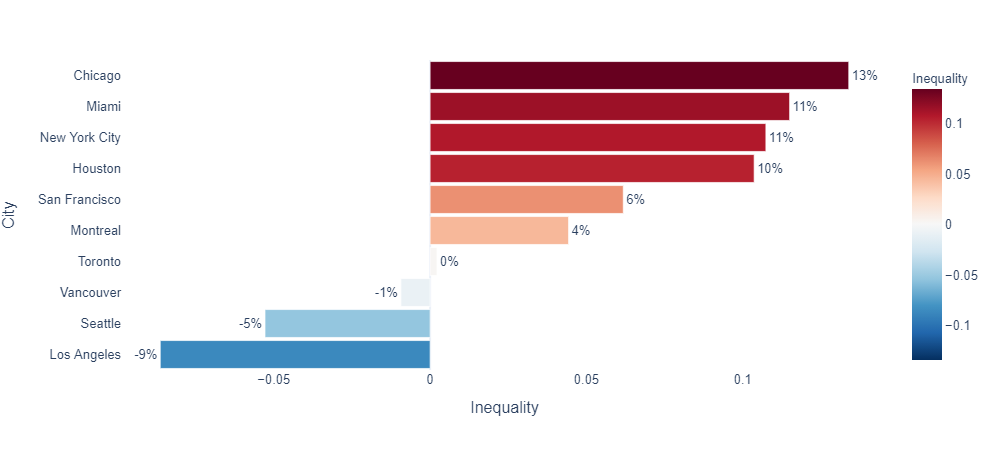

In [19]:
# plot inequality range bar chart
city = 'Montreal'
x2 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes'] == 2]
x5 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes'] == 5]
CM_LV = np.median(x2)
CM_MV = np.median(x5)
CM_inequality_range = (CM_LV - CM_MV)/CM_MV

city = 'Chicago'
x2 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes'] == 2]
x4 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes'] == 4]
CHI_LV = np.median(x2)
CHI_MV = np.median(x4)
CHI_inequality_range = (CHI_LV - CHI_MV)/CHI_MV

city = 'Vancouver'
x1 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes'] == 1]
x3 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes'] == 3]
CV_MV = np.median(x3)
CV_LV = np.median(x1)
CV_inequality_range = (CV_LV - CV_MV)/CV_MV
    
city = 'San Francisco'
x2 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes'] == 2]
x3 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes'] == 3]
SF_LV = np.median(x2)
SF_MV = np.median(x3)
SF_inequality_range = (SF_LV - SF_MV)/SF_MV
    
city = 'Toronto'
x3 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes'] == 3]
x5 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes'] == 5]
CTO_LV = np.median(x3)
CTO_MV = np.median(x5)
CTO_inequality_range = (CTO_LV - CTO_MV)/CTO_MV

city = 'New York City'
x3 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes'] == 3]
x5 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes'] == 5]
NYC_LV = np.median(x3)
NYC_MV = np.median(x5)
NYC_inequality_range = (NYC_LV - NYC_MV)/NYC_MV

city = 'Miami'
x2 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes'] == 2]
x3 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes'] == 3]
x1 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes'] == 1]
MIAMI_LV = np.median(x2)
MIAMI_MV = (np.median(x1)+np.median(x3))/2
MIAMI_inequality_range = (MIAMI_LV - MIAMI_MV)/MIAMI_MV

city = 'Houston'
x2 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes'] == 2]
x3 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes'] == 3]
x1 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes'] == 1]
HOUST_LV = np.median(x3)
HOUST_MV = (np.median(x1)+np.median(x2))/2
HOUST_inequality_range = (HOUST_LV - HOUST_MV)/HOUST_MV

city = 'Seattle'
x2 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes'] == 2]
x3 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes'] == 3]
x1 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes'] == 1]
x4 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes'] == 4]
x5 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes'] == 5]
SE_MV = (np.median(x4)+np.median(x5))/2
SE_LV = (np.median(x1)+np.median(x2)+np.median(x3))/3
SE_inequality_range = (SE_LV - SE_MV)/SE_MV

city = 'Philadelphia'
x3 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes'] == 3]
x1 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes'] == 1]
PHILLY_inequality_range = (np.median(x3) - np.median(x1))/np.median(x1)

city = 'Los Angeles'
x2 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes'] == 2]
x3 = cities[f'accessibil_{access_score_type}'][cities['city'] == city][cities['kmodes'] == 3]
LA_MV = np.median(x3)
LA_LV = np.median(x2)
LA_inequality_range = (LA_LV - LA_MV)/LA_MV

inequalities = {'City': ['Montreal', 'Chicago', 'Vancouver', 'San Francisco', 'Toronto', 
                         'New York City', 'Miami', 'Houston', 'Seattle',  'Los Angeles'], #'Philadelphia',
                "LV": [CM_LV, CHI_LV, CV_LV, SF_LV, CTO_LV, NYC_LV, MIAMI_LV, HOUST_LV, SE_LV, LA_LV],
                "MV": [CM_MV, CHI_MV, CV_MV, SF_MV, CTO_MV, NYC_MV, MIAMI_MV, HOUST_MV, SE_MV, LA_MV],
                'Inequality': [CM_inequality_range,  CHI_inequality_range, CV_inequality_range,  
                               SF_inequality_range, CTO_inequality_range, NYC_inequality_range, 
                               MIAMI_inequality_range, HOUST_inequality_range, SE_inequality_range, 
                                LA_inequality_range]} #PHILLY_inequality_range

inequalities = pd.DataFrame.from_dict(inequalities)

fig = px.bar(inequalities, 
             x="Inequality", y="City",# color="Country",
             template ='plotly_white', color = 'Inequality',
             color_continuous_scale=px.colors.diverging.RdBu_r,
             color_continuous_midpoint=0,
#              title="<b>Accessibility to Urban Infrastructure: Inequality Gap",
             hover_data=["Inequality"],
             orientation = 'h',
#              height=1500, 
             text='Inequality'
            ) # add day column to hover data

fig.update_layout(yaxis={'categoryorder':'total ascending'}, uniformtext_minsize=8, uniformtext_mode='hide',
                 font=dict(family="Helvetica", size=13), hoverlabel=dict(font_family="Helvetica"), 
                  xaxis_showgrid=False, yaxis_showgrid=False, autosize=False, #height=800,
                  width=1000, bargap=0.1, showlegend = False)

# fig.update(layout_showscale=False)

fig.update_traces(opacity=1, texttemplate='%{text:%}', textposition='outside')

fig.update_yaxes(zerolinewidth = 2)

#plotly.offline.plot(fig, filename=r'reports\Graphics\access_metrics\cities_ranked.html')
# fig.write_image(f"../../reports/access_metrics/graphs/cities_inequity_bar_{geom_type}.png", scale=5)
#py.iplot(fig, filename = 'CT_box', auto_open=True)
fig.show()
inequalities.sort_values("LV", ascending=False).to_csv(directory + f'cities_city_inequality.csv')

In [14]:
inequalities

,City,LV,MV,Inequality
0,Montreal,0.830594,0.795374,0.044282
1,Chicago,0.915942,0.807783,0.133895
2,Vancouver,0.724333,0.731155,-0.009331
3,San Francisco,0.793704,0.747524,0.061777
4,Toronto,0.671691,0.670222,0.002192
5,New York City,0.954024,0.861508,0.107388
6,Miami,0.708575,0.635504,0.028745
7,Houston,0.736496,0.667338,0.025908
8,Seattle,0.654797,0.691302,-0.052805
9,Los Angeles,0.704945,0.771536,-0.086310


In [150]:
from plotly.tools import FigureFactory as ff
from PIL import Image
from plotly.subplots import make_subplots

# img = Image.open(r"reports\graphics\access_metrics\maps\RO.png")

cities_ranked = list(cities.groupby(['city', 'Continent']).median().reset_index().
                     sort_values(by='accessibil_sc', ascending=False)['city'])

hist_data = [cities['accessibil_sc'][cities['city'] == city] for city in cities_ranked]

group_labels = [city for city in cities_ranked]
colors = ['rgba(244, 168, 26, 1)', 'rgba(241, 162, 25, 1)', 'rgba(238, 156, 24, 1)', 'rgba(238, 156, 24, 1)',
          'rgba(238, 156, 24, 1)', 'rgba(236, 170, 23, 1)', 'rgba(233, 164, 22, 1)', 'rgba(230, 157, 22, 1)', 
          'rgba(230, 157, 22, 1)', 'rgba(230, 157, 22, 1)','rgba(227, 151, 21, 1)', 'rgba(225, 144, 20, 1)',
          'rgba(222, 138, 19, 1)', 'rgba(222, 138, 19, 1)', 'rgba(222, 138, 19, 1)', 'rgba(219, 131, 18, 1)', 
          'rgba(216, 124, 17, 1)', 'rgba(214, 118, 16, 1)', 'rgba(214, 118, 16, 1)', 'rgba(214, 118, 16, 1)',
          'rgba(211, 111, 15, 1)', 'rgba(208, 105, 14, 1)', 'rgba(205, 98, 13, 1)', 'rgba(205, 98, 13, 1)', 
          'rgba(205, 98, 13, 1)', 'rgba(203, 92, 13, 1)', 'rgba(200, 85, 12, 1)', 'rgba(197, 79, 11, 1)', 
          'rgba(197, 79, 11, 1)', 'rgba(197, 79, 11, 1)', 'rgba(194, 72, 10, 1)', 'rgba(192, 66, 9, 1)', 
          'rgba(189, 59, 8, 1)', 'rgba(189, 59, 8, 1)', 'rgba(189, 59, 8, 1)', 'rgba(186, 52, 7, 1)', 
          'rgba(183, 46, 6, 1)', 'rgba(181, 39, 5, 1)', 'rgba(181, 39, 5, 1)', 'rgba(181, 39, 5, 1)',
          'rgba(178, 33, 4, 1)', 'rgba(175, 26, 4, 1)', 'rgba(172, 20, 3, 1)', 'rgba(172, 20, 3, 1)', 
          'rgba(172, 20, 3, 1)', 'rgba(170, 13, 2, 1)', 'rgba(167, 7, 1, 1)', 'rgba(164, 0, 0, 1)', 
          'rgba(164, 0, 0, 1)', 'rgba(164, 0, 0, 1)']

# colors = ['#ed6925', '#ed6925', '#ed6925']

for c in range(0, len(hist_data)):

    # Create distplot with curve_type set to 'normal'
    fig = ff.create_distplot([hist_data[c]], colors = [colors[c]], 
                             group_labels=[group_labels[c]],show_hist=False, 
                             show_rug=False, histnorm = 'probability')

    # Add title
    fig.update_layout(title = {'text':group_labels[c], 'xanchor': 'left','yanchor': 'bottom', 'y':0.07,'x':0.09, 
                               'font': dict(family="Georgia", size=38, color=colors[c])},
                      margin=dict(l=50, r=50,),
                      template = "plotly_white", showlegend=False, width=500, height=400,autosize=False,
                      font=dict(family="Helvetica", size=12), hoverlabel=dict(font_family="Helvetica"),
                      xaxis={'showgrid': False, 'zeroline':False, 'showticklabels': True}, 
                      yaxis={'showgrid': False, 'zeroline':True, 'showticklabels': False},
                      shapes= [{'line': {#'color': 'grey', 
                                         'dash': 'dot', 'width': 1},
                                         'type': 'line',
                                         'x0': np.median([hist_data[c]]),
                                         'x1': np.median([hist_data[c]]),
                                         'xref': 'x',
                                         'y0': 0,
                                         'y1': 0.954,
                                         'yref': 'paper'},],
                      # Annotations
                     annotations=[
    #                      dict(x=np.median([hist_data[1]]),
    #                                     y=1.1,
    #                                     xref='x',
    #                                     yref='paper',
    #                                     text="Accessibility Score: "+ str(round(np.median([hist_data[1]]), 1)),
    #                                     showarrow=True,
    #                                     arrowhead=7,
    #                                     ax=1,
    #                                     ay=1,
    # #                                     axref='paper',
    # #                                     ayref='paper'
    #                             ), 
                                 dict(x=0.305,
                                        y=-0.31,
                                        xref='x',
                                        yref='paper',
                                        text="Median Accessibility:  <b>"+ str(round(np.median([hist_data[c]])*100, 1))+"%",
                                        font=dict(family="Helvetica", size=20),
                                        showarrow=True,
                                        arrowhead=7,
                                        ax=1,
                                        ay=1,)])

    fig.update_xaxes(tickvals=[0, 0.2, 0.4, 0.6, 0.8], range=[0, 1])
    # fig.update_yaxes(range=[0, 9])

    # fig.add_layout_image(
    #     dict(
    #         source=img,
    #         xref="paper", yref="paper",
    #         x=0.5, y=1,
    #         sizex=1, sizey=1,
    #         xanchor="center", yanchor="top"
    #     )
    # )

#     fig.show()
    fig.write_image("reports/graphics/access_metrics/graphs/paper/city_{}.png".format(c), scale=1)

## Exploring Zipf's law

In [9]:
fig = px.scatter(cities, x='accessibil_sc', y='rank_a_log', #color='city',
                 log_x=False, log_y=False, #color_discrete_sequence=px.colors.qualitative.Pastel,
                 template ='plotly_white', trendline="ols").update_traces(marker=dict(color = "grey", size=2, opacity=0.5))

fig.update_layout(yaxis_title="log of Accessibility Rank",
                  xaxis_title="Accessibility Score")

# plotly.offline.plot(fig, filename=r'reports\Graphics\access_metrics\ScalingLaw.html')

fig.show()

# results = px.get_trendline_results(fig)
# print(results)

# results.px_fit_results.iloc[0].summary()

In [6]:
fig = px.scatter(cities[cities['city']=='Lima'], x='accessibil_sc', y='rank_a_log', #color='city',
                 log_x=False, log_y=False, #color_discrete_sequence=px.colors.qualitative.Pastel,
                 template ='plotly_white', trendline="ols").update_traces(marker=dict(color = "grey", size=2, opacity=0.5))

fig.update_layout(yaxis_title="log of Accessibility Rank",
                  xaxis_title="Accessibility Score")

# plotly.offline.plot(fig, filename=r'reports\Graphics\access_metrics\ScalingLaw.html')

fig.show()

results = px.get_trendline_results(fig)
print(results)

results.px_fit_results.iloc[0].summary()

In [184]:
fig = px.scatter(cities, x='accessibil_sc', y='rank_a_log', color='city',
                 log_x=False, log_y=False, color_discrete_sequence=px.colors.qualitative.Pastel,
                 template ='plotly_white').update_traces(marker=dict(size=2.5))

fig.update_layout(height = 500, width = 1000, yaxis_title="<b> log(Accessibility Rank)",
                  xaxis_title="<b> Accessibility Score",
                  showlegend=True, font=dict(family="Helvetica", size = 10), legend_title="", 
                  legend_orientation="h", legend = dict(x = 0.5, xanchor = 'center', y = 1.06, yanchor = 'middle'),
                  legend_itemsizing='constant') #legend_orientation="h", legend=dict(x=0.5, y=1))

#plotly.offline.plot(fig, filename=r'reports\Graphics\access_metrics\ScalingLaw.html')

fig.show()
#fig.write_image("reports/graphics/access_metrics/graphs/paper/scaling_law.png", scale=5)

In [20]:
# fig = px.scatter(cities, x='accessibil', y='rank_a', 
#                  color='city', log_x=False, log_y=True, color_discrete_sequence=px.colors.qualitative.Pastel,
#                  template ='plotly_white').update_traces(marker=dict(size=3.5))

# fig.update_layout(yaxis_title="log of Accessibility Rank",
#                   xaxis_title="Accessibility Score")

# # plotly.offline.plot(fig, filename=r'reports\Graphics\access_metrics\ScalingLaw.html')

# fig.show()

In [27]:
# fig = px.scatter(cities[cities['city']=='Lima'], x='health_wel_r', y='education_r', color='city',
#                  log_x=False, log_y=False, color_discrete_sequence=px.colors.qualitative.Pastel,
#                  template ='plotly_white').update_traces(marker=dict(size=2.5))

# fig.update_layout(yaxis_title="<b> Active Living",
#                   xaxis_title="<b> Mobility",
#                   showlegend=True, font=dict(family="Helvetica"), legend_title="", 
#                   legend_orientation="h") #legend_orientation="h", legend=dict(x=0.5, y=1))

# #plotly.offline.plot(fig, filename=r'reports\Graphics\access_metrics\ScalingLaw.html')

# fig.show()
# # fig.write_image("reports/graphics/access_metrics/graphs/paper/scaling_law.png", scale=5)

log(rank) = a*access_score + b 


rank = score power of something, take anti log == relationship of the law

In [15]:
fig = px.scatter(cities[(cities['city']=='Paris') | (cities['city']=='Shanghai') | 
                        (cities['city']=='Bogota') | (cities['city']=='New York City')], 
                 x='accessibil_sc', y='rank_a_log', #color='city',
                 log_x=False, log_y=False, facet_col='city', 
                 facet_col_wrap=2, color_discrete_sequence=px.colors.qualitative.Pastel,
                 template ='plotly_white', trendline="ols", color = 'city',
                 width=1000, height=450,).update_traces(marker=dict(size=2.5, opacity=1), line = dict(width=1))

fig.update_layout(font=dict(family="Helvetica", size=10), hoverlabel=dict(font_family="Helvetica"),
                  annotations=[dict(x=0.8,
                                        y=0.25,
                                        xref='x1',
                                        yref='y1',
                                        text="R<sup>2</sup> = 0.96<br /><br /><b>Shanghai</b>",
                                        font=dict(family="Helvetica", size=10),
                                        showarrow=True,
                                        arrowhead=7,
                                        ax=1,
                                        ay=1,),
                               
                               dict(x=0.4,
                                        y=0.8,
                                        xref='x3',
                                        yref='y3',
                                        text="<b>New York City</b> <br /><br />R<sup>2</sup> = 0.99",
                                        font=dict(family="Helvetica", size=10),
                                        showarrow=True,
                                        arrowhead=7,
                                        ax=1,
                                        ay=1,),
                               dict(x=0.8,
                                        y=0.25,
                                        xref='x2',
                                        yref='y2',
                                        text="R<sup>2</sup> = 0.92<br /><br /><b>Bogota</b> ",
                                        font=dict(family="Helvetica", size=10),
                                        showarrow=True,
                                        arrowhead=7,
                                        ax=4,
                                        ay=4,),
                               dict(x=0.4,
                                        y=0.8,
                                        xref='x4',
                                        yref='y4',
                                        text="<b>Paris</b> <br /><br />R<sup>2</sup> = 0.91",
                                        font=dict(family="Helvetica", size=10),
                                        showarrow=True,
                                        arrowhead=7,
                                        ax=1,
                                        ay=1,)])

fig.update_layout(showlegend = False)
fig.update_xaxes(tickvals=[0, 0.2, 0.4, 0.6, 0.8, 1])
fig.update_yaxes(tickvals=[0, 0.2, 0.4, 0.6, 0.8, 1])
fig.update_yaxes(row=1, col=1, title_text = "<b>log(Accessibility Rank)", )
fig.update_yaxes(row=2, col=1, title_text = "<b>log(Accessibility Rank)", )
fig.update_xaxes(row=1, col=1, title_text = "<b>Accessibility Score", )
fig.update_xaxes(row=1, col=2, title_text = "<b>Accessibility Score", )


fig.show()

# results = px.get_trendline_results(fig)
# print(results)

# results.px_fit_results.iloc[0].summary()
# fig.write_image("reports/graphics/access_metrics/graphs/paper/scaling_law_4cities.png", scale=5)

In [72]:
cities['kmodes_x'] = cities['kmodes_x'].astype('category')

In [76]:
# fig = px.bar(cities.groupby(['city', 'kmodes_x']).median().reset_index().sort_values(by='accessibil_sc', ascending=False), 
#              x="accessibil_sc", y="kmodes_x", color="kmodes_x", barmode = 'group',
#              template ='plotly_white', facet_row="city", facet_col_wrap = 3,
#              color_discrete_sequence=px.colors.qualitative.Pastel,
#              title="Accessibility to Urban Infrastructure by City",
#              hover_data=["accessibil_sc"],
#              orientation = 'h',
#             height=1500, 
#              text='accessibil_sc'
#             ) # add day column to hover data

# fig.update_layout(yaxis={'categoryorder':'total ascending'}, uniformtext_minsize=8, uniformtext_mode='hide',
#                  font=dict(family="Helvetica", size=15), hoverlabel=dict(font_family="Helvetica"), 
#                   xaxis_showgrid=False, yaxis_showgrid=False, autosize=False)

# fig.update_traces(opacity=1, texttemplate='%{text:%}', textposition='outside')

# #plotly.offline.plot(fig, filename=r'reports\Graphics\access_metrics\cities_ranked.html')
# #py.iplot(fig, filename = 'CT_box', auto_open=True)
# fig.show()

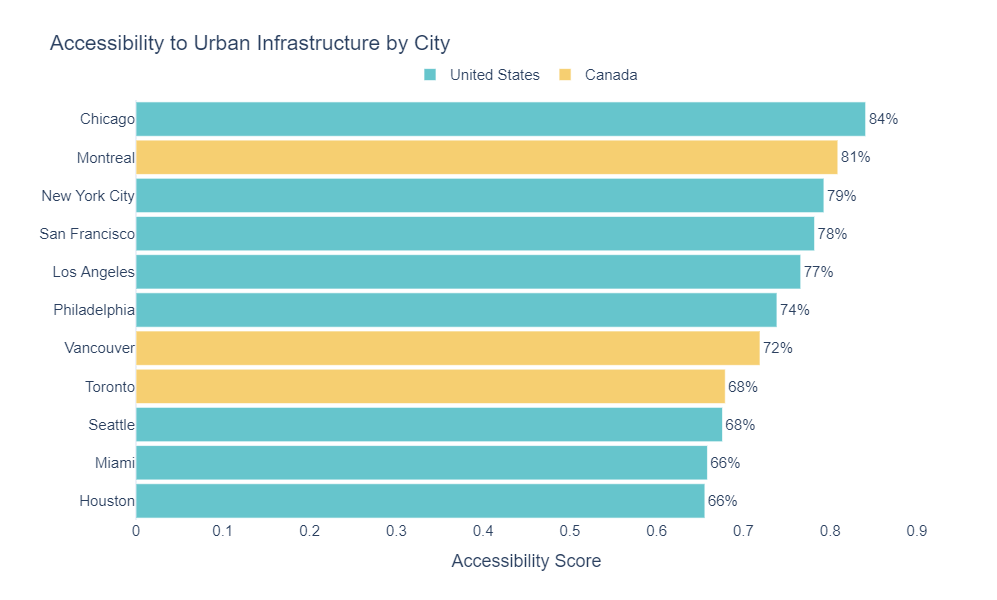

In [92]:
fig = px.bar(cities.groupby(['city', 'Country']).median().reset_index().sort_values(by='accessibil_wz', ascending=False),  #[cities['city']!='San Francisco']
             x="accessibil_wz", y="city", color="Country",
             template ='plotly_white',
             color_discrete_sequence=px.colors.qualitative.Pastel,
             title="Accessibility to Urban Infrastructure by City",
             hover_data=["accessibil_wz"],
             orientation = 'h',
#              height=1500, 
             text='accessibil_wz'
            ) # add day column to hover data

fig.update_layout(yaxis={'categoryorder':'total ascending'}, uniformtext_minsize=8, uniformtext_mode='hide',
                 font=dict(family="Helvetica", size=15), hoverlabel=dict(font_family="Helvetica"), 
                  xaxis_showgrid=False, yaxis_showgrid=False, autosize=False, #height=800,
                  width=1000, height = 600, legend_orientation="h",bargap=0.1, legend_title="",
                  legend = dict(x = 0.5, xanchor = 'center', y = 1.06, yanchor = 'middle'))

fig.update_traces(opacity=1, texttemplate='%{text:%}', textposition='outside')
fig.update_yaxes(title_text='')
fig.update_xaxes(title_text='Accessibility Score', range = [0,0.9])
#plotly.offline.plot(fig, filename=r'reports\Graphics\access_metrics\cities_ranked.html')
fig.write_image(f"../../reports/access_metrics/graphs/cities_access_bar_{geom_type}.png", scale=5)
#py.iplot(fig, filename = 'CT_box', auto_open=True)
fig.show()

In [94]:
# fig = px.bar(cities.groupby(['city', 'Country']).median().reset_index().sort_values(by='accessibil_sc', ascending=False), 
#              x="accessibil_sc", y="city", color="Country",
#              template ='plotly_white',
#              color_discrete_sequence=px.colors.qualitative.Pastel,
#              title="Accessibility to Urban Infrastructure by City",
#              hover_data=["accessibil_sc"],
#              orientation = 'h',
# #              height=1500, 
#              text='accessibil_sc'
#             ) # add day column to hover data

# fig.update_layout(yaxis={'categoryorder':'total ascending'}, uniformtext_minsize=8, uniformtext_mode='hide',
#                  font=dict(family="Helvetica", size=15), hoverlabel=dict(font_family="Helvetica"), 
#                   xaxis_showgrid=False, yaxis_showgrid=False, autosize=False, #height=800,
#                   width=1000,)

# fig.update_traces(opacity=1, texttemplate='%{text:%}', textposition='outside')

# #plotly.offline.plot(fig, filename=r'reports\Graphics\access_metrics\cities_ranked.html')
# #py.iplot(fig, filename = 'CT_box', auto_open=True)
# fig.show()

In [96]:
# heatmap
import plotly
import plotly.graph_objs as go

corrmat = cities[['mobility_r', 'active_liv_r', 'nightlife_r', 'food_choic_r', 
                 'community_r', 'education_r', 'health_wel_r']].corr()

mask =  np.tri(corrmat.shape[0], k=-1)
corrmat = np.ma.array(corrmat, mask=mask)
corrmat = pd.DataFrame(corrmat, columns = ['Mobility', 'Active Living', 'Nightlife', 'Food Choices', 
                 'Community Space', 'Education', 'Health and Wellbeing'])

corrmat = corrmat.replace(1, np.NaN)

heat = go.Heatmap(z=corrmat, x=corrmat.columns.tolist(), 
                  y=corrmat.columns.tolist(), xgap=10, ygap=10,
                  colorscale = plotly.colors.sequential.Reds)


plot_data = [heat]

# plotly.offline.plot(plot_data, filename='reports/graphics/access_metrics/heatmap_50_cities.html')

layout = go.Layout(title = "",
                   width=650, height=600,
                   xaxis_showgrid=False,
                   yaxis_showgrid=False,
                   template = "plotly_white", )#yaxis_autorange='reversed')
   
fig=go.Figure(data=[heat], layout=layout) 

# fig.write_image(f"../../reports/access_metrics/graphs/DH_heatmap.png", scale=5)
fig.show()

### Visualize accessibility by category by city

In [13]:
## reshape data for Spider plots: Function
def make_polar_df(cities_df = None, kmodes_extension = ''):
    
    '''Takes a dataframe with data for multiple cities and reshapes it to be visualized as a polar chart and parallel coordinate chart.'''
    spider_df = cities_df
    
    spider_df['mobility'] = mstats.winsorize(spider_df['mobility_r'], axis= 0, limits = [0.01,0.01])
    spider_df['active_liv'] = mstats.winsorize(spider_df['active_liv_r'], axis= 0, limits = [0.01,0.01])
    spider_df['nightlife'] = mstats.winsorize(spider_df['nightlife_r'], axis= 0, limits = [0.01,0.01])
    spider_df['food_choic'] = mstats.winsorize(spider_df['food_choic_r'], axis= 0, limits = [0.01,0.01])
    spider_df['community_'] = mstats.winsorize(spider_df['community_r'], axis= 0, limits = [0.01,0.01])
    spider_df['education'] = mstats.winsorize(spider_df['education_r'], axis= 0, limits = [0.01,0.01])
    spider_df['health_wel'] = mstats.winsorize(spider_df['health_wel_r'], axis= 0, limits = [0.01,0.01])
    
    spider_df = spider_df[['mobility', 'active_liv', 'nightlife', 'food_choic', 
                           'community_', 'education', 'health_wel', 'city', 'Continent', f'kmodes{kmodes_extension}']]

    groups_df = spider_df.groupby(['city', f'kmodes{kmodes_extension}']).median().reset_index()
    
    groups_df.columns = ['city', 'Social Group', 'Mobility', 'Active Living', 'Entertainment', 'Food Choices', 'Community Space',
                         'Education', 'Health and Well Being']
    
    groups_polar = pd.melt(groups_df, id_vars = ['city', 'Social Group'], value_vars=['Mobility', 'Active Living', 'Entertainment', 
                                                                            'Food Choices', 'Community Space','Education', 
                                                                            'Health and Well Being'])
    spider_df = spider_df[['mobility', 'active_liv', 'nightlife', 'food_choic', 
                           'community_', 'education', 'health_wel', 'city']]
    
    cities_df = spider_df.groupby('city').median().reset_index()
    
    cities_df.columns = ['city', 'Mobility', 'Active Living', 'Entertainment', 'Food Choices', 'Community Space',
                         'Education', 'Health and Well Being']
    
    cities_polar_no_groups = pd.melt(cities_df, id_vars = 'city', value_vars=['Mobility', 'Active Living', 'Entertainment', 
                                                                            'Food Choices', 'Community Space','Education', 
                                                                            'Health and Well Being'])
    
    return spider_df, groups_polar, cities_polar_no_groups


In [15]:
# # # # # # ## reshape data for Spider plots:
cities_par, cities_polar, cities_nogroups = make_polar_df(cities)

In [114]:
# cities_par['Continent_id'] = ""
# cities_par['Continent_id'][cities_par['Continent'] == 'North America'] = -2
# cities_par['Continent_id'][cities_par['Continent'] == 'Europe'] = 2
# cities_par['Continent_id'][cities_par['Continent'] == 'Latin America'] = 0
# cities_par['Continent_id'][cities_par['Continent'] == 'Oceania'] = 4
# cities_par['Continent_id'][cities_par['Continent'] == 'Africa'] = 1
# cities_par['Continent_id'][cities_par['Continent'] == 'Asia'] = 5

In [ ]:
fig = px.parallel_coordinates(cities_par, 
                              color = 'Continent_id',
                              dimensions=['Mobility', 'Active Living', 'Nightlife', 'Food Choices',
                                          'Community Space', 'Education', 'Health and Well Being'],
                              color_continuous_scale=px.colors.qualitative.Pastel,
                              color_continuous_midpoint=2) # add day column to hover data

# fig.update_layout(yaxis={'categoryorder':'total ascending'}, uniformtext_minsize=8, uniformtext_mode='hide',
#                  font=dict(family="Helvetica", size=15), hoverlabel=dict(font_family="Helvetica"), xaxis_showgrid=False, yaxis_showgrid=False)

# fig.update_traces(opacity=1, texttemplate='%{text:%}', textposition='outside')
#py.iplot(fig, filename = 'CT_box', auto_open=True)
fig.show()

In [97]:
cities_selected = 'all'

if cities_selected == 'CV_CHI':
    colors = [px.colors.qualitative.Pastel[0], px.colors.qualitative.Pastel[10]]
    df = cities_nogroups[cities_nogroups['city'].isin(['Chicago', 'Vancouver'])]
    legend_orientation = "h"
    y=1.2
    x = 0.5
    
else:
    colors = px.colors.qualitative.Pastel
    df = cities_nogroups
    legend_orientation = 'v'
    x = 1.2
    y = 0.5

fig = px.line_polar(df, #[cities_nogroups['city']!='Chicago'], [cities_nogroups['city'].isin(['Chicago', 'Vancouver'])]
                    r="value", theta="variable",
                    color="city",range_r=[0.5,1], line_close=True, template='plotly_white',
                   color_discrete_sequence=colors, 
#                    title="Accessibility to Urban Infrastructure by Social Group", 
                    line_group = "city").update_traces(line=dict(width=3,))#line_shape ='spline')


fig.update_layout( showlegend=True, template = "plotly_white", 
                  font=dict(family="Helvetica", size = 13.5), hoverlabel=dict(font_family="Helvetica"), legend_title="", 
                  legend_orientation=legend_orientation, legend = dict(x = x, xanchor = 'auto', y = y, yanchor = 'auto'),
                  legend_itemsizing='constant', width=800) #title = "Access to Urban Infrastructure by City",

# py.iplot(fig, filename = 'Calgary', auto_open=True)
#plotly.offline.plot(fig, filename=r'reports\Graphics\access_metrics\Calgary.html')
fig.show()
# py.io.write_image(fig, file= r'RealEstateData\Graphics\K-Means\CT\4clusters\polar.html')
fig.write_image(f"../../reports/access_metrics/graphs/cities_cat_{cities_selected}_{geom_type}.png", scale=5)

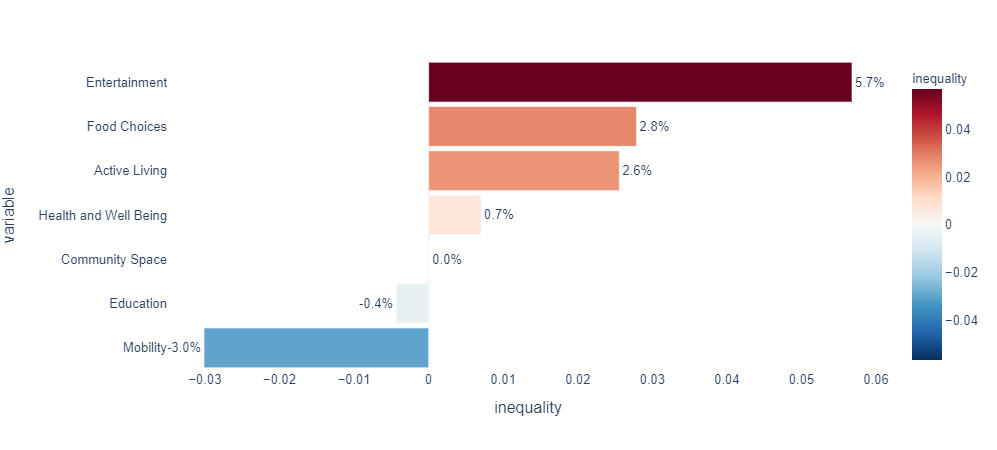

In [34]:
CHI_MV_LV = cities_polar[cities_polar['city']=='Chicago'][cities_polar['Social Group'].astype('str').isin(['2', '4'])]
CHI_MV_LV['Social Group'][cities_polar['Social Group'].astype('str') == '2'] = 'LV'
CHI_MV_LV['Social Group'][cities_polar['Social Group'].astype('str') == '4'] = 'MV'

CM_MV_LV = cities_polar[cities_polar['city']=='Montreal'][cities_polar['Social Group'].astype('str').isin(['2', '5'])]
CM_MV_LV['Social Group'][cities_polar['Social Group'].astype('str') == '2'] = 'LV'
CM_MV_LV['Social Group'][cities_polar['Social Group'].astype('str') == '5'] = 'MV'

CV_MV_LV = cities_polar[cities_polar['city']=='Vancouver'][cities_polar['Social Group'].astype('str').isin(['1', '3'])]
CV_MV_LV['Social Group'][cities_polar['Social Group'].astype('str') == '1'] = 'LV'
CV_MV_LV['Social Group'][cities_polar['Social Group'].astype('str') == '3'] = 'MV'

SF_MV_LV = cities_polar[cities_polar['city']=='San Francisco'][cities_polar['Social Group'].astype('str').isin(['2', '3'])]
SF_MV_LV['Social Group'][cities_polar['Social Group'].astype('str') == '2'] = 'LV'
SF_MV_LV['Social Group'][cities_polar['Social Group'].astype('str') == '3'] = 'MV'

CT_MV_LV = cities_polar[cities_polar['city']=='Toronto'][cities_polar['Social Group'].astype('str').isin(['3', '5'])]
CT_MV_LV['Social Group'][cities_polar['Social Group'].astype('str') == '3'] = 'LV'
CT_MV_LV['Social Group'][cities_polar['Social Group'].astype('str') == '5'] = 'MV'

NYC_MV_LV = cities_polar[cities_polar['city']=='New York City'][cities_polar['Social Group'].astype('str').isin(['3', '5'])]
NYC_MV_LV['Social Group'][cities_polar['Social Group'].astype('str') == '3'] = 'LV'
NYC_MV_LV['Social Group'][cities_polar['Social Group'].astype('str') == '5'] = 'MV'

MIAMI_MV_LV = cities_polar[cities_polar['city']=='Miami'][cities_polar['Social Group'].astype('str').isin(['2', '3'])]
MIAMI_MV_LV['Social Group'][cities_polar['Social Group'].astype('str') == '2'] = 'LV'
MIAMI_MV_LV['Social Group'][cities_polar['Social Group'].astype('str') == '3'] = 'MV'

SE_MV_LV = cities_polar[cities_polar['city']=='Seattle'][cities_polar['Social Group'].astype('str').isin(['1', '5'])]
SE_MV_LV['Social Group'][cities_polar['Social Group'].astype('str') == '1'] = 'LV'
SE_MV_LV['Social Group'][cities_polar['Social Group'].astype('str') == '5'] = 'MV'

PHILLY_MV_LV = cities_polar[cities_polar['city']=='Philadelphia'][cities_polar['Social Group'].astype('str').isin(['3', '1'])]
PHILLY_MV_LV['Social Group'][cities_polar['Social Group'].astype('str') == '3'] = 'LV'
PHILLY_MV_LV['Social Group'][cities_polar['Social Group'].astype('str') == '1'] = 'MV'

LA_MV_LV = cities_polar[cities_polar['city']=='Los Angeles'][cities_polar['Social Group'].astype('str').isin(['2', '3'])]
LA_MV_LV['Social Group'][cities_polar['Social Group'].astype('str') == '2'] = 'LV'
LA_MV_LV['Social Group'][cities_polar['Social Group'].astype('str') == '3'] = 'MV'

cities_MV_LV = pd.concat([CHI_MV_LV, CM_MV_LV, CV_MV_LV, SF_MV_LV, CT_MV_LV, NYC_MV_LV, MIAMI_MV_LV, SE_MV_LV, PHILLY_MV_LV, LA_MV_LV])

# cities_MV_LV
cities_MV_LV = cities_MV_LV.pivot_table(index=['variable', 'city'], columns='Social Group',
                    values='value', aggfunc='first').reset_index()

cities_MV_LV['inequality'] = (cities_MV_LV['LV'] - cities_MV_LV['MV'])/cities_MV_LV['MV']
# (np.median(x2) - np.median(x3))/np.median(x3)

var_MV_LV = cities_MV_LV.groupby('variable').mean().reset_index()
cities_MV_LV = cities_MV_LV.groupby('city').mean().reset_index()

fig = px.bar(var_MV_LV, 
             x="inequality", y="variable",# color="Country",
             template ='plotly_white', color = 'inequality',
             color_continuous_scale=px.colors.diverging.RdBu_r,
             color_continuous_midpoint=0,
#              title="<b>Accessibility to Urban Infrastructure: Inequality Gap",
             hover_data=["inequality"],
             orientation = 'h',
#              height=1500, 
             text='inequality'
            ) # add day column to hover data

fig.update_layout(yaxis={'categoryorder':'total ascending'}, uniformtext_minsize=8, uniformtext_mode='hide',
                 font=dict(family="Helvetica", size=13), hoverlabel=dict(font_family="Helvetica"), 
                  xaxis_showgrid=False, yaxis_showgrid=False, autosize=False, #height=800,
                  width=1000, bargap=0.1, showlegend = False)

# fig.update(layout_showscale=False)

fig.update_traces(opacity=1, texttemplate='%{text:0.1%}', textposition='outside')

fig.update_yaxes(zerolinewidth = 2)

#plotly.offline.plot(fig, filename=r'reports\Graphics\access_metrics\cities_ranked.html')
# fig.write_image(f"../../reports/access_metrics/graphs/cities_inequity_cat_{geom_type}.png", scale=5)
#py.iplot(fig, filename = 'CT_box', auto_open=True)
fig.show()
# var_MV_LV.to_csv(directory + f'cities_cat_inequality.csv')

In [110]:
# input parameters for vizualization
city = 'Chicago' # Vancouver, Montreal, Toronto, San Francisco, Chicago
city_initials = 'CHI'
access_score_type = 'wz' # wz for winsorized, sc for normal score
geom_type = 'census'
MV_LV_groups = ['2', '4']
# LV and MV groups: Vancouver = ['1', '3'], Toronto = ['3', '5'], Montreal = ['2', '5'], Chicago = ['2', '4'], San Francisco = ['3', '5']

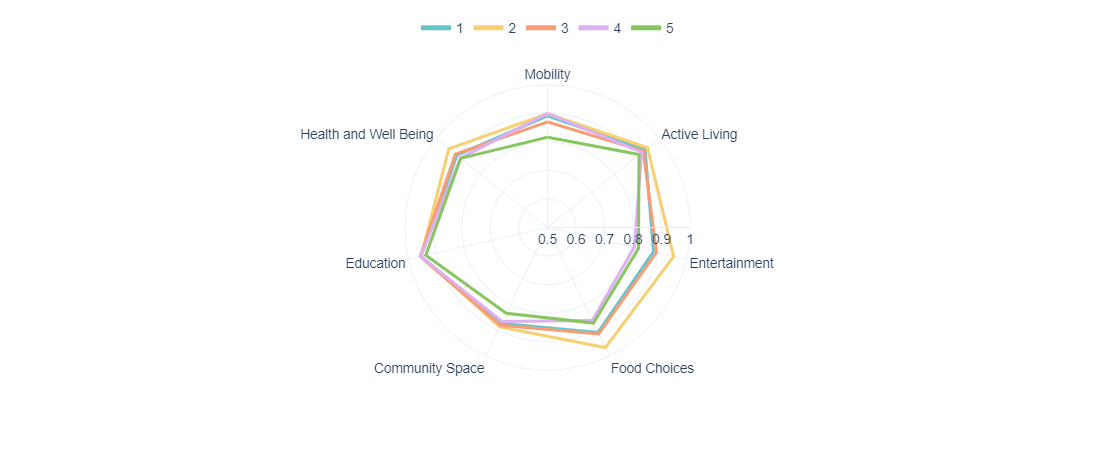

In [120]:
groups = "all" #or "MV_LV"

if groups  == "all":
    fig = px.line_polar(cities_polar[cities_polar['city']==city],
                            r="value", theta="variable",
                            color="Social Group", range_r=[0.5,1], line_close=True, template='plotly_white',
                           color_discrete_sequence=px.colors.qualitative.Pastel, 
                           #title="Accessibility to Urban Infrastructure by Social Group", 
                            line_group = "city").update_traces(line=dict(width=3,) )#line_shape ='spline')

else:
    fig = px.line_polar(cities_polar[cities_polar['city']==city][cities_polar['Social Group'].astype('str').isin(MV_LV_groups)],
                        r="value", theta="variable",
                        color="Social Group",range_r=[0.5,1], line_close=True, template='plotly_white',
                       color_discrete_sequence=px.colors.qualitative.Pastel, 
                       #title="Accessibility to Urban Infrastructure by Social Group", 
                        line_group = "city").update_traces(line=dict(width=3,) )#line_shape ='spline')

fig.update_layout(showlegend=True, template = "plotly_white", 
                  font=dict(family="Helvetica", size = 13.5), hoverlabel=dict(font_family="Helvetica"), legend_title="", 
                  legend_orientation="h", legend = dict(x = 0.5, xanchor = 'center', y = 1.2, yanchor = 'middle'),
                  legend_itemsizing='constant') 
# py.iplot(fig, filename = 'Calgary', auto_open=True)
#plotly.offline.plot(fig, filename=r'reports\Graphics\access_metrics\Calgary.html')
fig.show()
# py.io.write_image(fig, file= r'RealEstateData\Graphics\K-Means\CT\4clusters\polar.html')
fig.write_image(f"../../reports/access_metrics/graphs/{city_initials}_{groups}_{geom_type}.png", scale=5)

In [53]:
# import chart_studio.plotly as py
# import chart_studio
# chart_studio.tools.set_credentials_file(username='lnicolet', api_key='Ufr7eWCannABdYTNLmn4')
# import plotly
# import plotly.express as px
# import plotly.graph_objects as go

# fig = px.line_polar(cities_polar, r="value", theta="variable", 
#                     color="Continent",range_r=[0.6,1], line_close=True, template='plotly_white',
# #                    color_discrete_sequence=px.colors.qualitative.Dark2, 
#                    title="Accessibility to Urban Infrastructure by Social Group", 
#                     line_group = "city").update_traces(line=dict(width=2,), )#line_shape ='spline')

# # py.iplot(fig, filename = 'Calgary', auto_open=True)
# #plotly.offline.plot(fig, filename=r'reports\Graphics\access_metrics\Calgary.html')
# fig.show()
# # py.io.write_html(fig, file= r'RealEstateData\Graphics\K-Means\CT\4clusters\polar.html')
# #

## Vizualizing profiles of most vulnerable groups

In [50]:
city = 'Chicago'
city_initials = 'CHI'
geom_type = 'hex'
LV = 2
MV = 4
group_to_plot = 'both' #both, LV, MV, group number or all
variable = 'income_log'
variable_name = 'Education Level' # Education Level, Visible Minority Population, Median Income 

In [38]:
LV = [1, 3, 2, 3, 2, 2, 3, 2, 1, 2, 2]
MV = [3, 5, 5, 5, 4, 3, 1, 3, 5, 3, 1]

In [5]:
# # variables needed: Accessibility, income, education, Minority
# cities_kde = pd.melt(cities, id_vars = ['city', 'kmodes'], value_vars = ['accessibil_wz', 'income_log', 'Minority_log', 'education_log'])

# fig = px.violin(cities_kde[cities_kde['city'] == city][cities_kde['kmodes'].isin([LV])], x="value", y="variable", color="kmodes",
#              template='plotly_white', orientation='h', points=False, 
#                 color_discrete_sequence=px.colors.qualitative.Pastel,
#                title="Population with a University Degree by Social Group").update_traces(side="positive", width=1.5)

# #py.iplot(fig, filename = 'CT_JoyPlotUE', auto_open=True)
# fig.show()

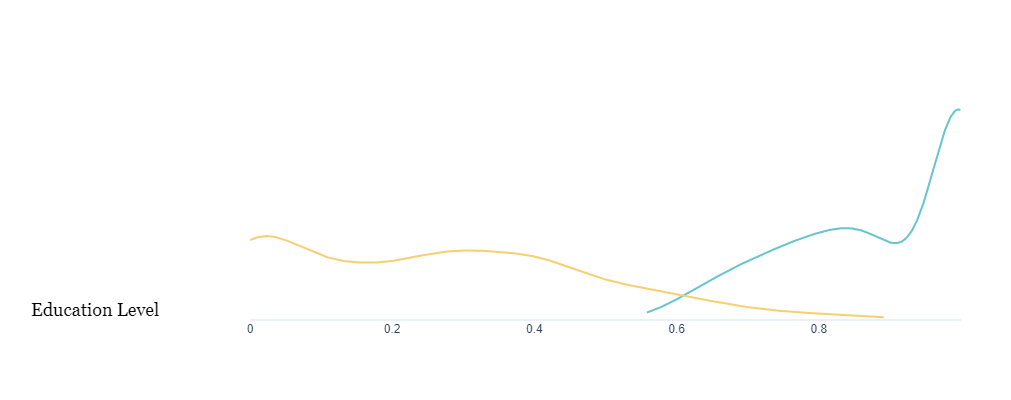

In [114]:
# plot MV and LV graphs
from plotly.tools import FigureFactory as ff
from PIL import Image
from plotly.subplots import make_subplots

if group_to_plot == 'both':
    
    x1 = cities[variable][cities['city'] == city][cities['kmodes'].isin([LV])].fillna(0)
    x2 = cities[variable][cities['city'] == city][cities['kmodes'].isin([MV])].fillna(0)
    
    hist_data = [x1, x2]

    group_labels = [f'Group {LV}', f'Group {MV}']
    
    colors = px.colors.qualitative.Pastel
    
else:
    x2 = cities[variable][cities['city'] == city][cities['kmodes'].isin([group_to_plot])].fillna(0)
    
    hist_data = [x2]

    group_labels = [f'Group {group_to_plot}']

    colors = [px.colors.qualitative.Pastel[group_to_plot-1]]

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, colors = colors, 
                         group_labels=group_labels,show_hist=False, 
                         show_rug=False, histnorm = 'probability')

# Add title
fig.update_layout(#title = {'text':city, 'xanchor': 'left','yanchor': 'bottom', 'y':0.07,'x':0.09, 
                  #         'font': dict(family="Georgia", size=30, color="black")},
                  margin=dict(l=250, r=50,),
                  template = "plotly_white", showlegend=False, width=900, height=400,autosize=False,
                  font=dict(family="Helvetica", size=12), hoverlabel=dict(font_family="Helvetica"),
                  xaxis={'showgrid': False, 'zeroline':False, 'showticklabels': True}, 
                  yaxis={'showgrid': False, 'zeroline':True, 'showticklabels': False},
#                   shapes= [{'line': {#'color': 'grey', 
#                                      'dash': 'dot', 'width': 1},
#                                      'type': 'line',
#                                      'x0': np.median([hist_data[1]]),
#                                      'x1': np.median([hist_data[1]]),
#                                      'xref': 'x',
#                                      'y0': 0,
#                                      'y1': 0.954,
#                                      'yref': 'paper'},],
                  #Annotations
                 annotations=[
#                      dict(x=np.median([hist_data[1]]),
#                                     y=1.1,
#                                     xref='x',
#                                     yref='paper',
#                                     text="Accessibility Score: "+ str(round(np.median([hist_data[1]]), 1)),
#                                     showarrow=True,
#                                     arrowhead=7,
#                                     ax=1,
#                                     ay=1,
# #                                     axref='paper',
# #                                     ayref='paper'
#                             ), 
                             dict(x=-0.22,
                                    y=0.05,
                                    xref='paper',
                                    yref='paper',
                                    text=variable_name,
                                    font=dict(family="Georgia", size=18, color="black"),
                                    showarrow=True,
                                    arrowhead=7,
                                    ax=1,
                                    ay=1,)]
)

fig.update_yaxes(zerolinewidth=2)
fig.update_xaxes(tickvals=[0, 0.2, 0.4, 0.6, 0.8], range=[0, 1])

if variable in ['accessibil_wz','Minority_log', 'education_log']:
    fig.update_xaxes(tickvals=[], range=[0, 1])
    fig.update_yaxes(zerolinewidth=1)
fig.update_yaxes(range=[0, 5])

# fig.add_layout_image(
#     dict(
#         source=img,
#         xref="paper", yref="paper",
#         x=0.5, y=1,
#         sizex=1, sizey=1,
#         xanchor="center", yanchor="top"
#     )
# )

fig.show()
# fig.write_image(f"../../reports/access_metrics/graphs/{city_initials}_{geom_type}_{variable}_{group_to_plot}.png", scale=5)

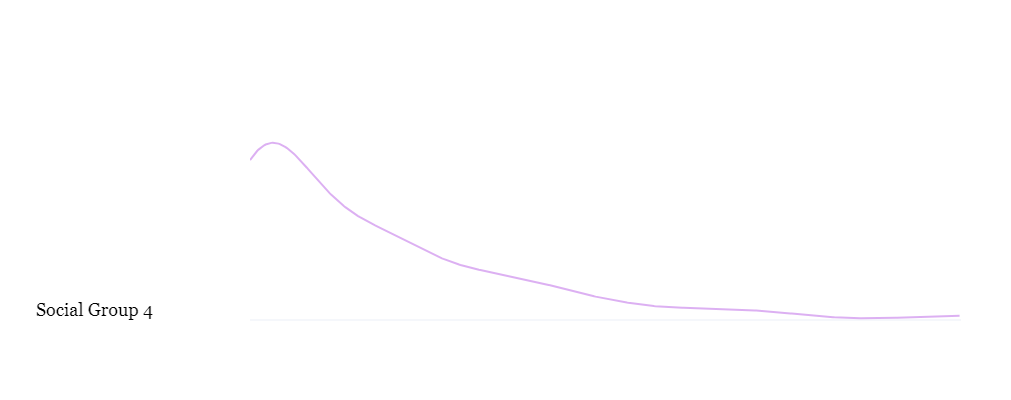

In [52]:
group_to_plot = 4 #both, LV, MV, group number or all
variable = 'education_log'
variable_name = 'Education Level'

# plot individual groups
from plotly.tools import FigureFactory as ff
from PIL import Image
from plotly.subplots import make_subplots


x2 = cities[variable][cities['city'] == city][cities['kmodes'].isin([group_to_plot])].fillna(0)

hist_data = [x2]

group_labels = [f'Social Group {group_to_plot}']

colors = [px.colors.qualitative.Pastel[group_to_plot-1]]

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, colors = colors, 
                         group_labels=group_labels,show_hist=False, 
                         show_rug=False, histnorm = 'probability')

# Add title
fig.update_layout(#title = {'text':city, 'xanchor': 'left','yanchor': 'bottom', 'y':0.07,'x':0.09, 
                  #         'font': dict(family="Georgia", size=30, color="black")},
                  margin=dict(l=250, r=50,),
                  template = "plotly_white", showlegend=False, width=900, height=400,autosize=False,
                  font=dict(family="Helvetica", size=12), hoverlabel=dict(font_family="Helvetica"),
                  xaxis={'showgrid': False, 'zeroline':False, 'showticklabels': True}, 
                  yaxis={'showgrid': False, 'zeroline':True, 'showticklabels': False},
#                   shapes= [{'line': {#'color': 'grey', 
#                                      'dash': 'dot', 'width': 1},
#                                      'type': 'line',
#                                      'x0': np.median([hist_data[1]]),
#                                      'x1': np.median([hist_data[1]]),
#                                      'xref': 'x',
#                                      'y0': 0,
#                                      'y1': 0.954,
#                                      'yref': 'paper'},],
                  #Annotations
                 annotations=[
#                      dict(x=np.median([hist_data[1]]),
#                                     y=1.1,
#                                     xref='x',
#                                     yref='paper',
#                                     text="Accessibility Score: "+ str(round(np.median([hist_data[1]]), 1)),
#                                     showarrow=True,
#                                     arrowhead=7,
#                                     ax=1,
#                                     ay=1,
# #                                     axref='paper',
# #                                     ayref='paper'
#                             ), 
                             dict(x=-0.22,
                                    y=0.05,
                                    xref='paper',
                                    yref='paper',
                                    text=group_labels[0],
                                    font=dict(family="Georgia", size=18, color="black"),
                                    showarrow=True,
                                    arrowhead=7,
                                    ax=1,
                                    ay=1,)]
)

if group_to_plot == 1:
    fig.update_layout(title = {'text':variable_name, 'xanchor': 'left','yanchor': 'bottom', 'y':0.6,'x':0.5, 
                      'font': dict(family="Georgia", size=25, color="black")})

fig.update_yaxes(zerolinewidth=2)
fig.update_xaxes(tickvals=[0, 0.2, 0.4, 0.6, 0.8], range=[0, 1])

if group_to_plot in [1, 2, 3, 4]:
    fig.update_xaxes(tickvals=[], range=[0, 1])
    fig.update_yaxes(zerolinewidth=1)
    
fig.update_yaxes(range=[0, 4])

# fig.add_layout_image(
#     dict(
#         source=img,
#         xref="paper", yref="paper",
#         x=0.5, y=1,
#         sizex=1, sizey=1,
#         xanchor="center", yanchor="top"
#     )
# )

fig.show()
# fig.write_image(f"../../reports/access_metrics/graphs/{city_initials}_{geom_type}_{variable}_{group_to_plot}.png", scale=5)

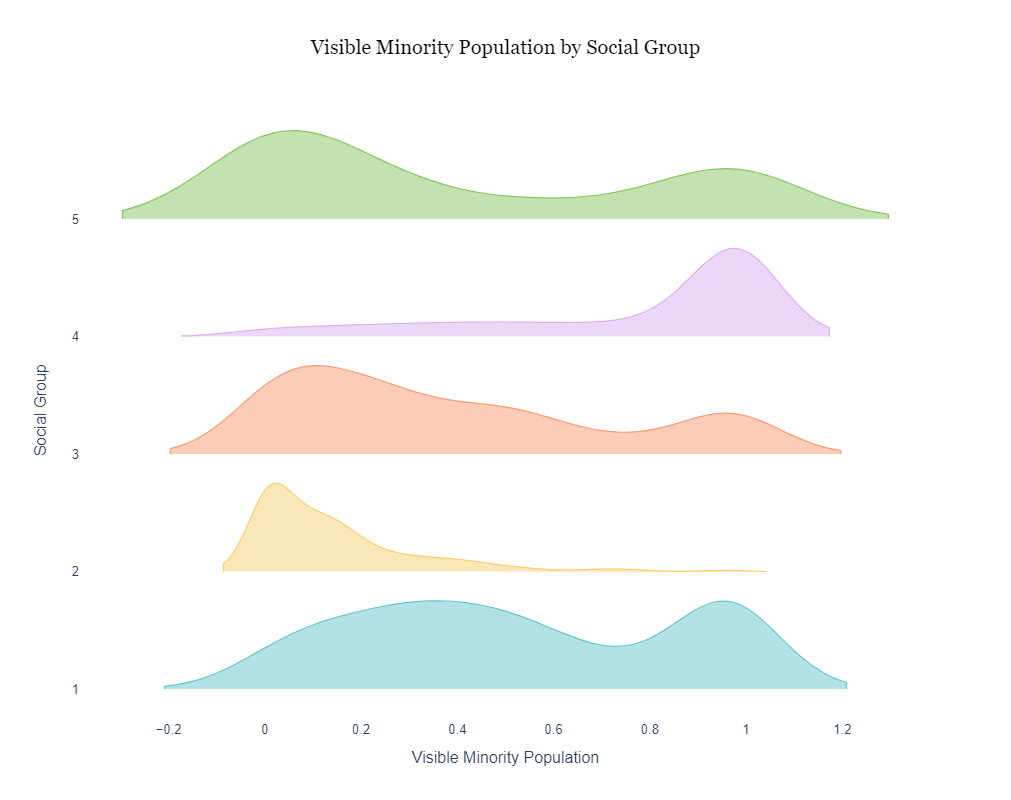

In [64]:
variable = 'Minority_log'
variable_name = 'Visible Minority Population'
# variable_name = 'Median Income'

fig = px.violin(cities[cities['city']==city].sort_values(['kmodes'], ascending = True), x=variable, y="kmodes", color="kmodes",
             template='plotly_white', orientation='h', points=False, 
                color_discrete_sequence=px.colors.qualitative.Pastel,
               title=variable_name).update_traces(side="positive", width=1.5)

fig.update_traces(marker=dict(size=2, opacity=0.5), line=dict(width=1.2))
# fig.update_yaxes(showgrid=False, zerolinewidth=1)
fig.update_yaxes(tickvals = [1,2,3,4,5])

fig.update_layout(title = {'text':f"{variable_name} by Social Group", 
                           'xanchor': 'center','yanchor': 'top', 'y':0.95,'x':0.5,
                           'font': dict(family="Georgia", size=20, color="black")},
                  xaxis={'showgrid': False, 'zeroline':False, 'showticklabels': True, 'title': variable_name}, 
                  yaxis={'showgrid': False, 'zeroline':False, 'showticklabels': True, 'title': 'Social Group'},
                  font=dict(family="Helvetica", size=13), hoverlabel=dict(font_family="Helvetica"),
                  showlegend=False, width = 800, height = 800)
#py.iplot(fig, filename = 'CT_JoyPlotUE', auto_open=True)
fig.write_image(f"../../reports/access_metrics/graphs/{city_initials}_{geom_type}_{variable}_kde.png", scale=5)

fig.show()

In [129]:
# plot all cities MV and LV
from plotly.tools import FigureFactory as ff
from PIL import Image
from plotly.subplots import make_subplots

if city == 'all':
    
    if group_to_plot == 'both':
    
        x1 = cities[variable][cities['city'] == 'Vancouver'][cities['kmodes'].isin([MV[0]])].fillna(0)
        x2 = cities[variable][cities['city'] == 'Toronto'][cities['kmodes'].isin([MV[1]])].fillna(0)
        x3 = cities[variable][cities['city'] == 'Montreal'][cities['kmodes'].isin([MV[2]])].fillna(0)
        x4 = cities[variable][cities['city'] == 'New York City'][cities['kmodes'].isin([MV[3]])].fillna(0)
        x5 = cities[variable][cities['city'] == 'Chicago'][cities['kmodes'].isin([MV[4]])].fillna(0)
        x6 = cities[variable][cities['city'] == 'Miami'][cities['kmodes'].isin([MV[5]])].fillna(0)
        x7 = cities[variable][cities['city'] == 'Philadelphia'][cities['kmodes'].isin([MV[6]])].fillna(0)
        x8 = cities[variable][cities['city'] == 'Los Angeles'][cities['kmodes'].isin([MV[7]])].fillna(0)
        x9 = cities[variable][cities['city'] == 'Seattle'][cities['kmodes'].isin([MV[8]])].fillna(0)
        x10 = cities[variable][cities['city'] == 'San Francisco'][cities['kmodes'].isin([MV[9]])].fillna(0)
        x11 = cities[variable][cities['city'] == 'Houston'][cities['kmodes'].isin([MV[10]])].fillna(0)
        x12 = cities[variable][cities['city'] == 'Vancouver'][cities['kmodes'].isin([LV[0]])].fillna(0)
        x13 = cities[variable][cities['city'] == 'Toronto'][cities['kmodes'].isin([LV[1]])].fillna(0)
        x14 = cities[variable][cities['city'] == 'Montreal'][cities['kmodes'].isin([LV[2]])].fillna(0)
        x15 = cities[variable][cities['city'] == 'New York City'][cities['kmodes'].isin([LV[3]])].fillna(0)
        x16 = cities[variable][cities['city'] == 'Chicago'][cities['kmodes'].isin([LV[4]])].fillna(0)
        x17 = cities[variable][cities['city'] == 'Miami'][cities['kmodes'].isin([LV[5]])].fillna(0)
        x18 = cities[variable][cities['city'] == 'Philadelphia'][cities['kmodes'].isin([LV[6]])].fillna(0)
        x19 = cities[variable][cities['city'] == 'Los Angeles'][cities['kmodes'].isin([LV[7]])].fillna(0)
        x20 = cities[variable][cities['city'] == 'Seattle'][cities['kmodes'].isin([LV[8]])].fillna(0)
        x21 = cities[variable][cities['city'] == 'San Francisco'][cities['kmodes'].isin([LV[9]])].fillna(0)
        x22 = cities[variable][cities['city'] == 'Houston'][cities['kmodes'].isin([LV[10]])].fillna(0)

        hist_data = [x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20, x21, x22]

        group_labels = ['Vancouver', 'Toronto', 'Montreal', 'New York City', 'Chicago', 'Miami', 'Philadelphia', 'Los Angeles',
                       'Seattle', 'San Francisco', 'Houston', 'Vancouver', 'Toronto', 'Montreal', 'New York City', 'Chicago', 
                        'Miami', 'Philadelphia', 'Los Angeles', 'Seattle', 'San Francisco', 'Houston']

        colors = [px.colors.qualitative.Pastel[1], px.colors.qualitative.Pastel[1], px.colors.qualitative.Pastel[1], 
                  px.colors.qualitative.Pastel[1], px.colors.qualitative.Pastel[1], px.colors.qualitative.Pastel[1],
                  px.colors.qualitative.Pastel[1], px.colors.qualitative.Pastel[1], px.colors.qualitative.Pastel[1],
                  px.colors.qualitative.Pastel[1], px.colors.qualitative.Pastel[1], px.colors.qualitative.Pastel[0],
                  px.colors.qualitative.Pastel[0], px.colors.qualitative.Pastel[0], px.colors.qualitative.Pastel[0],
                  px.colors.qualitative.Pastel[0], px.colors.qualitative.Pastel[0], px.colors.qualitative.Pastel[0],
                  px.colors.qualitative.Pastel[0], px.colors.qualitative.Pastel[0], px.colors.qualitative.Pastel[0],
                  px.colors.qualitative.Pastel[0]]
    

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, colors = colors, 
                         group_labels=group_labels,show_hist=False, 
                         show_rug=False, histnorm = 'probability')

# Add title
fig.update_layout(#title = {'text':city, 'xanchor': 'left','yanchor': 'bottom', 'y':0.07,'x':0.09, 
                  #         'font': dict(family="Georgia", size=30, color="black")},
                  margin=dict(l=250, r=50,),
                  template = "plotly_white", showlegend=False, width=900, height=400,autosize=False,
                  font=dict(family="Helvetica", size=12), hoverlabel=dict(font_family="Helvetica"),
                  xaxis={'showgrid': False, 'zeroline':False, 'showticklabels': True}, 
                  yaxis={'showgrid': False, 'zeroline':True, 'showticklabels': False},
#                   shapes= [{'line': {#'color': 'grey', 
#                                      'dash': 'dot', 'width': 1},
#                                      'type': 'line',
#                                      'x0': np.median([hist_data[1]]),
#                                      'x1': np.median([hist_data[1]]),
#                                      'xref': 'x',
#                                      'y0': 0,
#                                      'y1': 0.954,
#                                      'yref': 'paper'},],
                  #Annotations
                 annotations=[
#                      dict(x=np.median([hist_data[1]]),
#                                     y=1.1,
#                                     xref='x',
#                                     yref='paper',
#                                     text="Accessibility Score: "+ str(round(np.median([hist_data[1]]), 1)),
#                                     showarrow=True,
#                                     arrowhead=7,
#                                     ax=1,
#                                     ay=1,
# #                                     axref='paper',
# #                                     ayref='paper'
#                             ), 
                             dict(x=-0.22,
                                    y=0.05,
                                    xref='paper',
                                    yref='paper',
                                    text=variable_name,
                                    font=dict(family="Georgia", size=18, color="black"),
                                    showarrow=True,
                                    arrowhead=7,
                                    ax=1,
                                    ay=1,)]
)

fig.update_yaxes(zerolinewidth=2)
fig.update_xaxes(tickvals=[0, 0.2, 0.4, 0.6, 0.8], range=[0, 1])

if variable in ['accessibil_wz','Minority_log', 'education_log']:
    fig.update_xaxes(tickvals=[], range=[0, 1])
    fig.update_yaxes(zerolinewidth=1)
fig.update_yaxes(range=[0, 5.1])

# fig.add_layout_image(
#     dict(
#         source=img,
#         xref="paper", yref="paper",
#         x=0.5, y=1,
#         sizex=1, sizey=1,
#         xanchor="center", yanchor="top"
#     )
# )

fig.show()
fig.write_image(f"../../reports/access_metrics/graphs/{city_initials}_{geom_type}_jp_{variable}_{group_to_plot}.png", scale=5)

In [11]:
# Accessibility boxplot

import plotly.express as px
fig = px.box(cities[cities['city']== city].sort_values('kmodes_x'), 
             x="kmodes_x", y="accessibil_wz", color="kmodes_x",
             template='plotly_white',
             notched=False, # used notched shape
#              points='all',
             color_discrete_sequence=px.colors.qualitative.Pastel,
#              title="Accessibility to Urban Infrastructure by Social Group",
             hover_data=["accessibil_sc"]) # add day column to hover data
                                        
fig.update_traces(boxpoints='all', jitter=0.9, marker=dict(size=2, opacity=0.5), line=dict(width=1.2), pointpos=0)
# fig.update_yaxes(showgrid=False, zerolinewidth=1)
# fig.update_xaxes(showgrid=False, zerolinewidth=1)

fig.update_layout(title = {'text':"Accessibility to Urban Infrastructure by Social Group", 
                           'xanchor': 'center','yanchor': 'top', 'y':0.95,'x':0.5,
                           'font': dict(family="Georgia", size=20, color="black")},
                  xaxis={'showgrid': False, 'zeroline':False, 'showticklabels': True, 'title': 'Social Group'}, 
                  yaxis={'showgrid': False, 'zeroline':False, 'showticklabels': True, 'title': 'Accessibility Score'},
                  font=dict(family="Helvetica", size=13), hoverlabel=dict(font_family="Helvetica"),
                  showlegend = False)
#py.iplot(fig, filename = 'CT_box', auto_open=True)
fig.write_image(f"../../reports/access_metrics/graphs/{city_initials}_{geom_type}_access_box.png", scale=5)
fig.show()

In [ ]:
#merge cities together
## before we merge, group labels must match across cities

# temporary new column
CT_access_k4cls_Census['k4cls_n'] = 0
CV_access_k4cls_Census['k4cls_n'] = 0
CM_access_k4cls_Census['k4cls_n'] = 0
CE_access_k4cls_Census['k4cls_n'] = 0
CO_access_k4cls_Census['k4cls_n'] = 0
CC_access_k4cls_Census['k4cls_n'] = 0

# re-number groups so that they are consistent across cities
## Toronto
CT_access_k4cls_Census['k4cls_n'][CT_access_k4cls_Census['k4cls'] == 3] = 0
CT_access_k4cls_Census['k4cls_n'][CT_access_k4cls_Census['k4cls'] == 0] = 4
CT_access_k4cls_Census['k4cls_n'][CT_access_k4cls_Census['k4cls'] == 1] = 1
CT_access_k4cls_Census['k4cls_n'][CT_access_k4cls_Census['k4cls'] == 2] = 2
## Vancouver
CV_access_k4cls_Census['k4cls_n'][CV_access_k4cls_Census['k4cls'] == 2] = 4
CV_access_k4cls_Census['k4cls_n'][CV_access_k4cls_Census['k4cls'] == 0] = 0
CV_access_k4cls_Census['k4cls_n'][CV_access_k4cls_Census['k4cls'] == 1] = 1
CV_access_k4cls_Census['k4cls_n'][CV_access_k4cls_Census['k4cls'] == 3] = 3
## Montreal
CM_access_k4cls_Census['k4cls_n'][CM_access_k4cls_Census['k4cls'] == 3] = 1
CM_access_k4cls_Census['k4cls_n'][CM_access_k4cls_Census['k4cls'] == 1] = 4
CM_access_k4cls_Census['k4cls_n'][CM_access_k4cls_Census['k4cls'] == 0] = 0
CM_access_k4cls_Census['k4cls_n'][CM_access_k4cls_Census['k4cls'] == 2] = 2
## Edmonton
CE_access_k4cls_Census['k4cls_n'][CE_access_k4cls_Census['k4cls'] == 1] = 0
CE_access_k4cls_Census['k4cls_n'][CE_access_k4cls_Census['k4cls'] == 2] = 1
CE_access_k4cls_Census['k4cls_n'][CE_access_k4cls_Census['k4cls'] == 0] = 2
CE_access_k4cls_Census['k4cls_n'][CE_access_k4cls_Census['k4cls'] == 3] = 3
## Ottawa
CO_access_k4cls_Census['k4cls_n'][CO_access_k4cls_Census['k4cls'] == 2] = 1
CO_access_k4cls_Census['k4cls_n'][CO_access_k4cls_Census['k4cls'] == 1] = 2
CO_access_k4cls_Census['k4cls_n'][CO_access_k4cls_Census['k4cls'] == 3] = 4
CO_access_k4cls_Census['k4cls_n'][CO_access_k4cls_Census['k4cls'] == 0] = 0
## Calgary
CC_access_k4cls_Census['k4cls_n'][CC_access_k4cls_Census['k4cls'] == 0] = 0
CC_access_k4cls_Census['k4cls_n'][CC_access_k4cls_Census['k4cls'] == 1] = 1
CC_access_k4cls_Census['k4cls_n'][CC_access_k4cls_Census['k4cls'] == 2] = 2
CC_access_k4cls_Census['k4cls_n'][CC_access_k4cls_Census['k4cls'] == 3] = 3

# CM_access_k4cls_Census['k4cls'] = CM_access_k4cls_Census["k4cls_n"]
# CM_access_k4cls_Census = CM_access_k4cls_Census.drop(['k4cls_n'], axis=1)



CMCTCV_access_k4cls_Census = pd.concat([CM_access_k4cls_Census, CV_access_k4cls_Census, 
                                        CT_access_k4cls_Census, CE_access_k4cls_Census, 
                                        CC_access_k4cls_Census, CO_access_k4cls_Census], ignore_index=True)

In [ ]:
# change social group names
df_melt['Group_txt'] = ""
df_melt['Group_txt'][df_melt['Social Group'] == 0] = "High Income Suburban Families"
df_melt['Group_txt'][df_melt['Social Group'] == 1] = "High Income Professionals"
df_melt['Group_txt'][df_melt['Social Group'] == 2] = "Low Income Immigrant Minorities"
df_melt['Group_txt'][df_melt['Social Group'] == 3] = "High Income Couples and Families"
df_melt['Group_txt'][df_melt['Social Group'] == 4] = "Low Income Canadian Minority Families"

In [208]:
df_city = cities_polar.groupby(['city','variable']).mean().reset_index().drop('Social Group', axis = 1)

import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(#subplot_titles=('Toronto','Vancouver','Montreal','Calgary','Ottawa','Edmonton'), 
                    vertical_spacing = 0.15, horizontal_spacing=0.0001, #column_widths =(2,2,2), #row_heights =[20,20],
                    rows=2, cols=3, specs=[[{'type': 'polar'}]*3]*2)

#fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      name = "Chicago",
      r = df_city[df_city['city']=='Chicago']['value'],
      theta = df_city[df_city['city']=='Chicago']['variable'],
    hovertemplate ='Accessibility: %{r}<br>'+
                   'Category: %{theta}<b>',
    # title="Toronto",
   # text = "Toronto",
    #height = 20
    ),1,1)

# fig.add_trace(go.Scatterpolar(
#       name = "New York City",
#       r = df_city[df_city['city']=='New York City']['value'],
#       theta = df_city[df_city['city']=='New York City']['variable'],
#     hovertemplate ='Accessibility: %{r}<br>'+
#                    'Category: %{theta}<b>',
#     ),1,2)

fig.add_trace(go.Scatterpolar(
      name = "San Francisco",
      r = df_city[df_city['city']=="San Francisco"]['value'],
      theta = df_city[df_city['city']=="San Francisco"]['variable'],
    hovertemplate ='Accessibility: %{r}<br>'+
                   'Category: %{theta}<b>',
    ),1,2)

fig.add_trace(go.Scatterpolar(
      name = "Vancouver",
      r = df_city[df_city['city']=='Vancouver']['value'],
      theta = df_city[df_city['city']=='Vancouver']['variable'],
    hovertemplate ='Accessibility: %{r}<br>'+
                   'Category: %{theta}<b>',
    ),1,3)

fig.add_trace(go.Scatterpolar(
      name = "Toronto",
      r = df_city[df_city['city']=='Toronto']['value'],
      theta = df_city[df_city['city']=='Toronto']['variable'],
    hovertemplate ='Accessibility: %{r}<br>'+
                   'Category: %{theta}<b>',
    ),2,1)

fig.add_trace(go.Scatterpolar(
      name = "Montreal",
      r = df_city[df_city['city']=='Montreal']['value'],
      theta = df_city[df_city['city']=='Montreal']['variable'],
    hovertemplate ='Accessibility: %{r}<br>'+
                   'Category: %{theta}<b>',
    ),2,2)



    
fig.update_traces(fill='toself', connectgaps= True, marker=dict(opacity=0, size=3), line = dict(width=0), opacity=0.8) #, , shape='spline'

fig.update_layout(title = "Access to Urban Infrastructure", showlegend=False, template = "plotly_white", 
                  font=dict(family="Helvetica"), hoverlabel=dict(font_family="Helvetica"), 
                  annotations = [
                      dict(xref='paper', yref='paper',
                                x=-0.035, y=1.16, showarrow=False, text ='What Shape is your City?'), 
                                dict(xref='paper', yref='paper', x=0.14, y=0.81, showarrow=False, text ='<b>Chicago', 
                                    font=dict(size=10)),
                                dict(xref='paper', yref='paper', x=0.5, y=0.81, showarrow=False, text ='<b>San Francisco',
                                    font=dict(size=10)),
                                dict(xref='paper', yref='paper', x=0.865, y=0.81, showarrow=False, text ='<b>Vancouver',
                                    font=dict(size=10)),
                                dict(xref='paper', yref='paper', x=0.14, y=0.2, showarrow=False, text ='<b>Toronto',
                                    font=dict(size=10)),
                                dict(xref='paper', yref='paper', x=0.5, y=0.2, showarrow=False, text ='<b>Montreal',
                                    font=dict(size=10))],
#                                 dict(xref='paper', yref='paper', x=0.89, y=-0.12, showarrow=False, text ='<b>Montreal',
#                                     font=dict(size=10))],
    polar = dict(
        radialaxis = dict(range=[0.5, 1], showticklabels=False, linewidth=0, visible=True), 
        angularaxis = dict(tickfont_size = 8),
    ),
    polar2 = dict(
        radialaxis = dict(range=[0.5, 1], showticklabels=False, linewidth=0,),
        angularaxis = dict(tickfont_size = 8),
    ),
    polar3 = dict(
        radialaxis = dict(range=[0.5, 1], showticklabels=False, linewidth=0,),
        angularaxis = dict(tickfont_size = 8),
    ),
    polar4 = dict(
        radialaxis = dict(range=[0.5, 1], showticklabels=False, linewidth=0,),
        angularaxis = dict(tickfont_size = 8),
    ),
    polar5 = dict(
        radialaxis = dict(range=[0.5, 1], showticklabels=False, linewidth=0,),
        angularaxis = dict(tickfont_size = 8),
    )
)

#py.iplot(fig, filename = 'Cities', auto_open=True)

fig.show()

### Visualize accessibility by category by city